In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Cleaning and filtering

In [2]:
df_past = pd.read_excel(r"Past_Data.xlsx").set_index('Index')
df_past

,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
Index,,,,,,,,,
511306,52,2,2013-01-01,0,0,0,a,1,0
150763,677,2,2013-01-01,0,0,0,a,1,0
633749,348,2,2013-01-01,0,0,0,a,1,0
106460,966,2,2013-01-01,0,0,0,a,1,0
278363,750,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...
300659,656,2,2015-03-31,464,1,1,0,1,5595
1708,349,2,2015-03-31,912,1,1,0,1,8975
269948,94,2,2015-03-31,728,1,1,0,1,10610


In [3]:
df_past.isna().sum().sum()

0

In [4]:
df_past.duplicated().sum()

0

In [5]:
df_past.columns = df_past.columns.str.lower().str.replace(' ', '_')
df_past.columns

Index(['store_id', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

In [6]:
df_past.dtypes

store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
dtype: object

In [7]:
df_past.nunique()
# there are 555140 entries of store's data (sales per day, per store)
# there are 1115 stores
# there are entries for 820 dates

store_id                1115
day_of_week                7
date                     820
nb_customers_on_day     3819
open                       2
promotion                  2
state_holiday              4
school_holiday             2
sales                  19654
dtype: int64

In [8]:
cat_vars = ['day_of_week','open', 'promotion', 'state_holiday', 'school_holiday']
for column in cat_vars:
    unique_values = df_past[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for day_of_week:
[2 3 4 5 6 7 1]

Unique values for open:
[0 1]

Unique values for promotion:
[0 1]

Unique values for state_holiday:
['a' 0 'b' 'c']

Unique values for school_holiday:
[1 0]



In [9]:
coverage_mapping = {'a': 1, 'b': 1, 'c': 1, 0: 0}
df_past['state_holiday'] = df_past['state_holiday'].map(coverage_mapping)
df_past['state_holiday'].unique()

array([1, 0], dtype=int64)

In [10]:
df_past['day'] = df_past['date'].dt.day
df_past['month'] = df_past['date'].dt.month
df_past['year'] = df_past['date'].dt.year
df_past['quarter'] = df_past['date'].dt.quarter
df_past['week'] = df_past['date'].dt.isocalendar().week 

In [11]:
df_past.to_csv('past_data_clean.csv')

## Loading cleaned data

In [12]:
df = pd.read_csv(r"past_data_clean.csv").set_index('Index')
df

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,week
Index,,,,,,,,,,,,,,
511306,52,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
150763,677,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
633749,348,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
106460,966,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
278363,750,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300659,656,2,2015-03-31,464,1,1,0,1,5595,31,3,2015,1,14
1708,349,2,2015-03-31,912,1,1,0,1,8975,31,3,2015,1,14
269948,94,2,2015-03-31,728,1,1,0,1,10610,31,3,2015,1,14


In [13]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                   int64
school_holiday                  int64
sales                           int64
day                             int64
month                           int64
year                            int64
quarter                         int64
week                            int64
dtype: object

In [14]:
df_closedays = df[df['open'] == 0]
df_closedays

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,week
Index,,,,,,,,,,,,,,
511306,52,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
150763,677,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
633749,348,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
106460,966,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
278363,750,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122036,1039,7,2015-03-29,0,0,0,0,0,0,29,3,2015,1,13
570327,109,7,2015-03-29,0,0,0,0,0,0,29,3,2015,1,13
103697,1038,7,2015-03-29,0,0,0,0,0,0,29,3,2015,1,13


In [15]:
print((len(df_closedays)/len(df))*100)
#stores are closed o 16.8% of the days

16.811615088085887


In [16]:
df_opendays = df[df['open'] == 1]
df_opendays

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,week
Index,,,,,,,,,,,,,,
580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1,1
277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1,1
253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1,1
239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1,1
60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300659,656,2,2015-03-31,464,1,1,0,1,5595,31,3,2015,1,14
1708,349,2,2015-03-31,912,1,1,0,1,8975,31,3,2015,1,14
269948,94,2,2015-03-31,728,1,1,0,1,10610,31,3,2015,1,14


## Exploratory Data Analysis

#### Overview

In [17]:
df_closedays.nunique()

store_id               1105
day_of_week               7
date                    565
nb_customers_on_day       1
open                      1
promotion                 2
state_holiday             2
school_holiday            2
sales                     1
day                      31
month                    12
year                      3
quarter                   4
week                     52
dtype: int64

In [18]:
df_opendays.nunique()

store_id                1115
day_of_week                7
date                     820
nb_customers_on_day     3819
open                       1
promotion                  2
state_holiday              2
school_holiday             2
sales                  19654
day                       31
month                     12
year                       3
quarter                    4
week                      52
dtype: int64

#### Target variable = Sales

In [19]:
df['sales'].describe()

count    555140.000000
mean       5750.773942
std        3830.939859
min           0.000000
25%        3712.000000
50%        5710.000000
75%        7813.000000
max       38037.000000
Name: sales, dtype: float64

In [20]:
open_close = df.groupby('open').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']})
open_close.columns = ['_'.join(col).strip('_') for col in open_close.columns.values]
open_close

,sales_min,sales_mean,sales_max,sales_std,sales_sum
open,,,,,
0,0,0.00000,0,0.000000,0
1,0,6912.95299,38037,3099.662291,3192484646


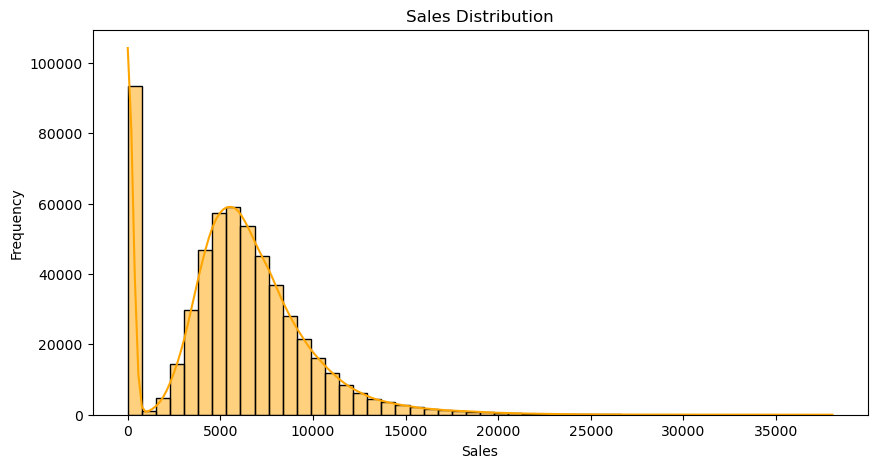

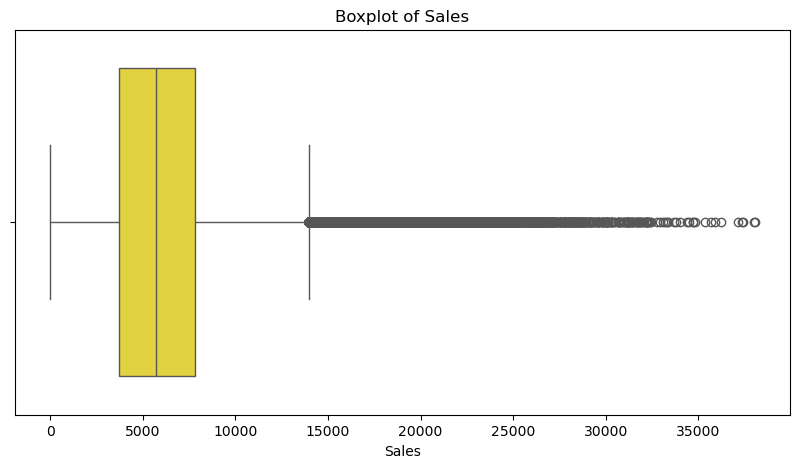

<Figure size 640x480 with 0 Axes>

In [21]:
# Histogram for Sales Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['sales'], bins=50, kde=True, color='orange')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Outliers in Sales
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['sales'], color='#fde725')
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.show()
plt.savefig('sales_dist_df.png', dpi=300)

In [22]:
df_opendays['sales'].describe()
# there are 473807 entries of sales for when stores are open
# when stores are open some sales are still 0

count    461812.000000
mean       6912.952990
std        3099.662291
min           0.000000
25%        4819.000000
50%        6325.000000
75%        8311.000000
max       38037.000000
Name: sales, dtype: float64

In [23]:
zero_sales_rows = df_opendays[df_opendays['sales'] == 0]
count_zero_sales = len(zero_sales_rows)
count_zero_sales
# only 28 cases of 0 sales on open days (around 0,005% of the whole dataset and 0,006% of open days)

28

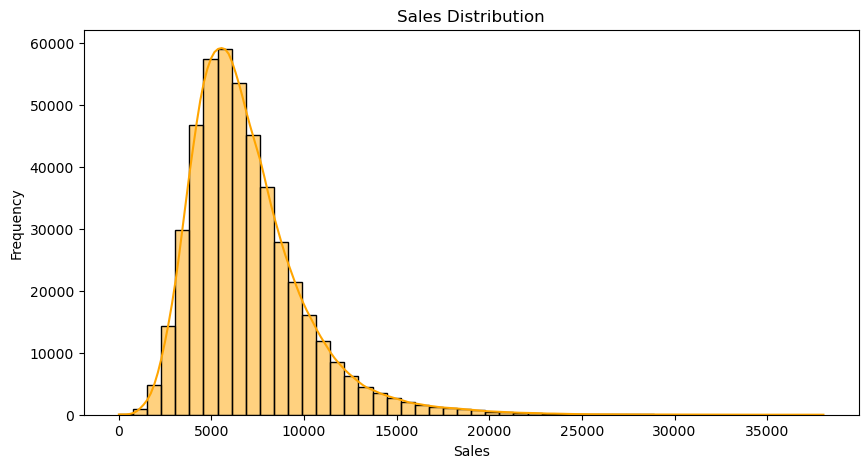

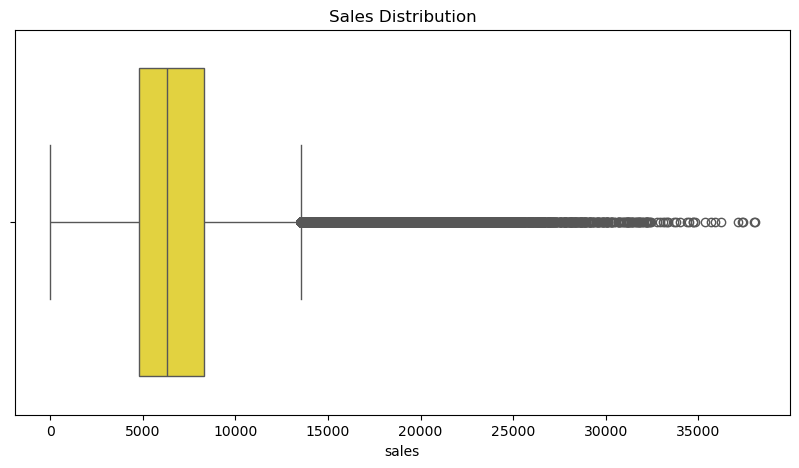

In [136]:
# Histogram for Sales Distribution on Open days
plt.figure(figsize=(10, 5))
sns.histplot(df_opendays['sales'], bins=50, kde=True, color='orange')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Outliers in Sales
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_opendays['sales'], color='#fde725')
plt.title('Sales Distribution')
plt.savefig('sales_dist_df_open.png', dpi=300)
plt.show()

In [25]:
# To understand the outliers
# Calculate the summary statistics for 'sales'
min_val = df_opendays['sales'].min()
Q1 = df_opendays['sales'].quantile(0.25)
Q2 = df_opendays['sales'].median()
Q3 = df_opendays['sales'].quantile(0.75)
IQR = Q3 - Q1
max_val = df_opendays['sales'].max()
upper_bound = Q3 + 1.5 * IQR

print(f"Summary statistics for 'sales':")
print(f"Minimum: {min_val}")
print(f"25th Percentile (Q1): {Q1}")
print(f"Median (Q2): {Q2}")
print(f"75th Percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Maximum: {max_val}")
print(f"Upper Bound (Q3 + 1.5 * IQR): {upper_bound}")

# days with an amount of sales superior to 13549 can be considered outliers

Summary statistics for 'sales':
Minimum: 0
25th Percentile (Q1): 4819.0
Median (Q2): 6325.0
75th Percentile (Q3): 8311.0
Interquartile Range (IQR): 3492.0
Maximum: 38037
Upper Bound (Q3 + 1.5 * IQR): 13549.0


#### Number of customers on day

In [26]:
df['nb_customers_on_day'].describe()

count    555140.000000
mean        634.534616
std         464.169013
min           0.000000
25%         405.000000
50%         609.000000
75%         839.000000
max        5494.000000
Name: nb_customers_on_day, dtype: float64

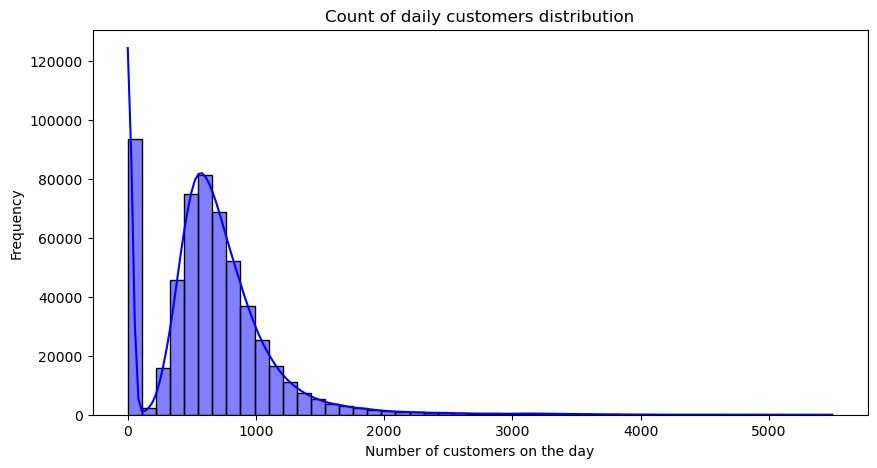

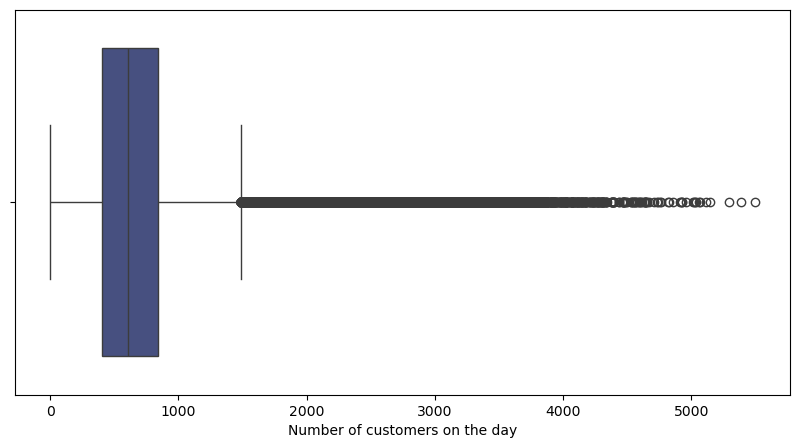

<Figure size 640x480 with 0 Axes>

In [27]:
# Histogram 
plt.figure(figsize=(10, 5))
sns.histplot(df['nb_customers_on_day'], bins=50, kde=True, color='blue')
plt.title('Count of daily customers distribution')
plt.xlabel('Number of customers on the day')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['nb_customers_on_day'], color='#3e4989')
plt.xlabel('Number of customers on the day')
plt.show()
plt.savefig('cust_dist_df.png', dpi=300)

In [28]:
df_opendays['nb_customers_on_day'].describe()
# some open days have nb_customers_on_day = 0

count    461812.000000
mean        762.768284
std         401.473840
min           0.000000
25%         517.000000
50%         676.000000
75%         894.000000
max        5494.000000
Name: nb_customers_on_day, dtype: float64

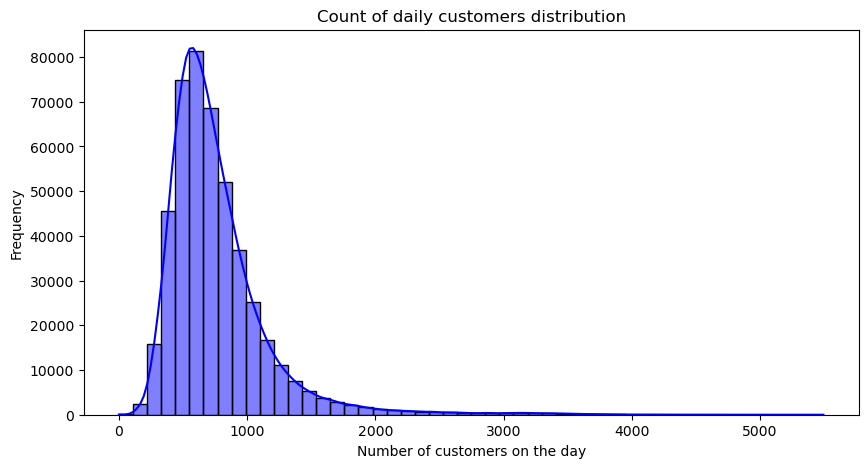

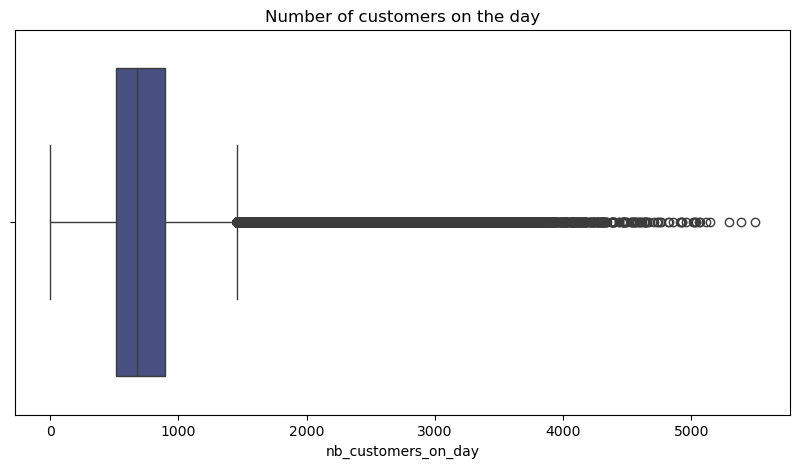

In [135]:
# Histogram for Open days
plt.figure(figsize=(10, 5))
sns.histplot(df_opendays['nb_customers_on_day'], bins=50, kde=True, color='blue')
plt.title('Count of daily customers distribution')
plt.xlabel('Number of customers on the day')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Outliers on Open days
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_opendays['nb_customers_on_day'], color='#3e4989')
plt.title('Number of customers on the day')
plt.savefig('cust_dist_df_open.png', dpi=300)
plt.show()

In [30]:
# To understand the outliers
# Calculate the summary statistics for 'nb_customers_on_day'
min_val = df_opendays['nb_customers_on_day'].min()
Q1 = df_opendays['nb_customers_on_day'].quantile(0.25)
Q2 = df_opendays['nb_customers_on_day'].median()
Q3 = df_opendays['nb_customers_on_day'].quantile(0.75)
IQR = Q3 - Q1
max_val = df_opendays['nb_customers_on_day'].max()
upper_bound = Q3 + 1.5 * IQR

print(f"Summary statistics for 'nb_customers_on_day':")
print(f"Minimum: {min_val}")
print(f"25th Percentile (Q1): {Q1}")
print(f"Median (Q2): {Q2}")
print(f"75th Percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Maximum: {max_val}")
print(f"Upper Bound (Q3 + 1.5 * IQR): {upper_bound}")

# days with a count of customers superior to 1459.5 can be considered outliers

Summary statistics for 'nb_customers_on_day':
Minimum: 0
25th Percentile (Q1): 517.0
Median (Q2): 676.0
75th Percentile (Q3): 894.0
Interquartile Range (IQR): 377.0
Maximum: 5494
Upper Bound (Q3 + 1.5 * IQR): 1459.5


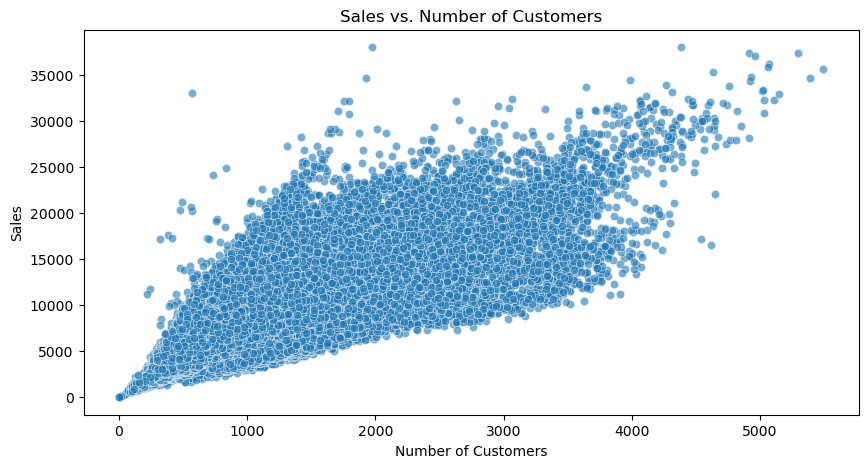

<Figure size 640x480 with 0 Axes>

In [31]:
# Check correlation
plt.figure(figsize=(10, 5))
sns.scatterplot(x='nb_customers_on_day', y='sales', data=df_opendays, alpha=0.6)
plt.title('Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()
plt.savefig('scatter_sales_cust.png', dpi=300)

#### Store ID

In [32]:
store_customers = df_opendays.groupby('store_id').agg({'nb_customers_on_day': ['mean','max','min','std','sum']})
store_customers.columns = ['_'.join(col).strip('_') for col in store_customers.columns.values]

store_customers = store_customers.sort_values(by=('nb_customers_on_day_mean'), ascending=False)
store_customers # top and bottom mean nb_customers_on_day

,nb_customers_on_day_mean,nb_customers_on_day_max,nb_customers_on_day_min,nb_customers_on_day_std,nb_customers_on_day_sum
store_id,,,,,
733,3415.507042,4645,1365,347.385384,1697507
262,3393.564639,5494,2255,578.141422,1785015
817,3143.394144,4547,738,600.511780,1395667
1114,3135.837647,4637,1160,435.858451,1332731
562,3103.171756,4099,1931,330.859384,1626062
...,...,...,...,...,...
1068,306.217593,644,180,60.869370,132286
307,305.874419,592,116,93.516078,131526
232,299.413462,557,0,66.440460,124556


In [33]:
store_customers = store_customers.sort_values(by=('nb_customers_on_day_max'), ascending=False)
store_customers # top and bottom max nb_customers_on_day

,nb_customers_on_day_mean,nb_customers_on_day_max,nb_customers_on_day_min,nb_customers_on_day_std,nb_customers_on_day_sum
store_id,,,,,
262,3393.564639,5494,2255,578.141422,1785015
586,2336.813953,4762,996,521.142959,1004830
733,3415.507042,4645,1365,347.385384,1697507
1114,3135.837647,4637,1160,435.858451,1332731
251,2451.647196,4635,1022,363.017576,1049305
...,...,...,...,...,...
263,344.717532,549,226,64.604495,106173
407,310.526786,540,154,56.838650,104337
573,335.195195,509,183,67.692659,111620


In [34]:
store_sales = df_opendays.groupby('store_id').agg({'sales': ['mean','max','min','std','sum']})
store_sales.columns = ['_'.join(col).strip('_') for col in store_sales.columns.values]

store_sales = store_sales.sort_values(by=('sales_mean'), ascending=False)
store_sales # top and bottom mean sales per store per day

,sales_mean,sales_max,sales_min,sales_std,sales_sum
store_id,,,,,
817,21810.779279,38025,6052,4787.544951,9683986
262,20592.108365,37403,13210,4605.054030,10831449
1114,20013.536471,33188,8987,3208.588203,8505753
251,19070.841121,35350,8373,3659.892873,8162320
513,18227.086247,29019,8267,3425.093219,7819420
...,...,...,...,...,...
254,2948.044289,6114,582,842.517520,1264711
208,2924.782998,5864,1557,713.616567,1307378
198,2922.400463,8772,530,1655.264038,1262477


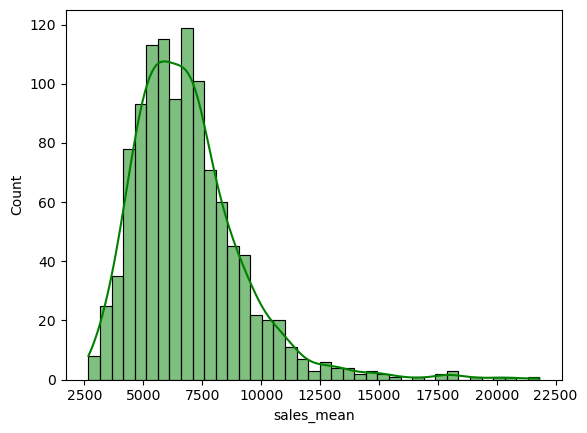

In [35]:
sns.histplot(store_sales['sales_mean'], color='green',  kde=True)
plt.savefig('sales_dist_mean_df_open.png', dpi=300)

# a few stores have very high average sales compared to the others

In [36]:
store_sales = store_sales.sort_values(by=('sales_max'), ascending=False)
store_sales # top and bottom max sales per store per day

,sales_mean,sales_max,sales_min,sales_std,sales_sum
store_id,,,,,
57,10950.090465,38037,0,4052.913533,4478587
817,21810.779279,38025,6052,4787.544951,9683986
262,20592.108365,37403,13210,4605.054030,10831449
251,19070.841121,35350,8373,3659.892873,8162320
756,16458.714286,33668,4033,4115.497758,7027871
...,...,...,...,...,...
210,3171.741546,5946,1542,847.031191,1313101
794,3052.029748,5920,1786,553.194875,1333737
208,2924.782998,5864,1557,713.616567,1307378


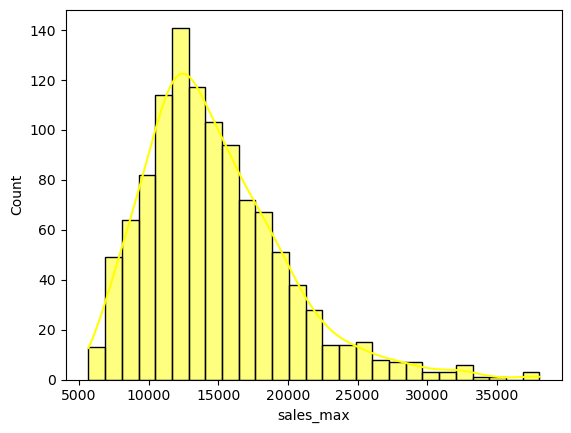

In [37]:
sns.histplot(store_sales['sales_max'], color='yellow', kde=True)
plt.savefig('sales_dist_max_df_open.png', dpi=300)

In [38]:
store_aggregates = df.groupby('store_id').mean()

# Calculate correlations
store_correlations = store_aggregates.corr()['sales'].drop('sales')
store_correlations

day_of_week            0.014872
nb_customers_on_day    0.840028
open                   0.241752
promotion             -0.002978
state_holiday         -0.091385
school_holiday         0.061151
day                    0.014437
month                  0.079608
year                   0.049499
quarter                0.075617
week                   0.081463
Name: sales, dtype: float64

#### Day of week

               count         mean          std  min     25%     50%     75%  \
day_of_week                                                                   
1            78991.0  7849.631996  3967.572526  0.0  5251.0  7302.0  9971.0   
2            79778.0  6946.073918  3144.742082  0.0  4849.0  6409.0  8448.0   
3            79152.0  6453.086707  2941.143968  0.0  4640.0  6050.0  7828.0   
4            79276.0  6204.141796  3180.089078  0.0  4510.0  5974.5  7723.0   
5            79453.0  6774.943866  3040.685372  0.0  5007.0  6450.0  8214.0   
6            79401.0  5808.359769  2872.366827  0.0  3864.0  5366.0  7179.0   
7            79089.0   204.794940  1611.251271  0.0     0.0     0.0     0.0   

                 max  
day_of_week           
1            38037.0  
2            34692.0  
3            32149.0  
4            37403.0  
5            36227.0  
6            30940.0  
7            37376.0  


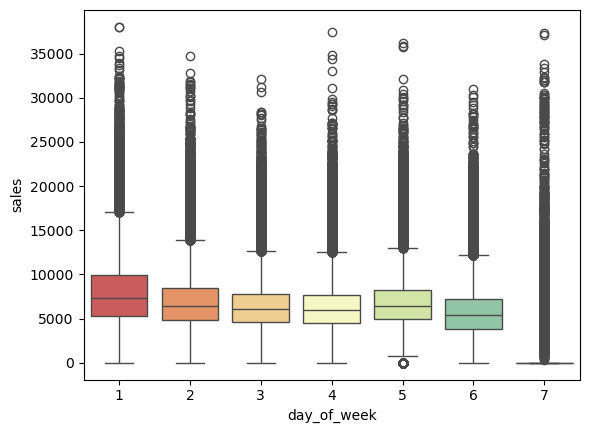

In [39]:
sns.boxplot(y='sales', x='day_of_week', data=df, palette='Spectral')
stats = df.groupby('day_of_week')['sales'].describe()

# Display the statistics
print(stats)
plt.show()

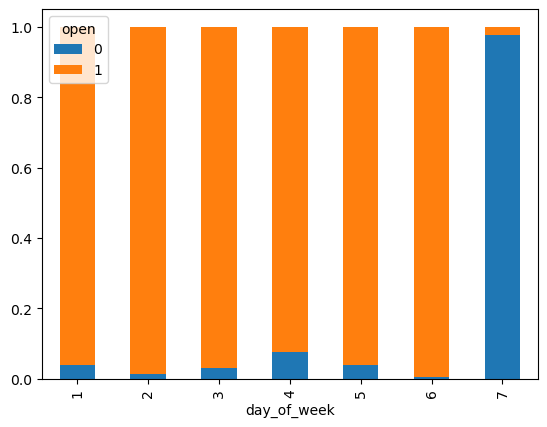

<Figure size 640x480 with 0 Axes>

In [40]:
day_week_open = df.groupby('day_of_week')['open'].value_counts(normalize=True).unstack()
day_week_open.plot(kind='bar', stacked='True')
plt.show()
plt.savefig('day_week_open_close_ratio.png', dpi=300)

# day 1 has the highest mean of sales, day 7 has the lowest since stores are usually close (that's why all sales look like outliers in the boxplot)

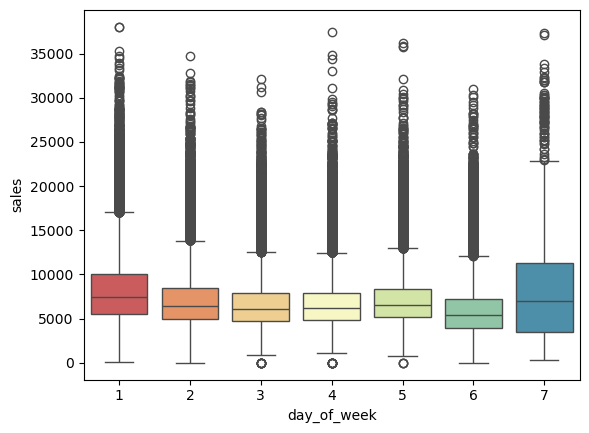

In [123]:
sns.boxplot(y='sales', x='day_of_week', data=df_opendays, palette='Spectral')
plt.savefig('sales_day_week_df_open.png', dpi=300)

In [42]:
day_week_sales = df_opendays.groupby('day_of_week').agg({'sales': ['mean','max','min','std','sum']})
day_week_sales.columns = ['_'.join(col).strip('_') for col in day_week_sales.columns.values]

day_week_sales = day_week_sales.sort_values(by= 'sales_mean', ascending=False)
day_week_sales # top and bottom mean sales in all stores per day of the week

# day 7 is Sunday, sum of sales is low, but when the stores open on this day, it sales well in average

,sales_mean,sales_max,sales_min,sales_std,sales_sum
day_of_week,,,,,
7,8272.230337,37376,286,6176.351973,16197027
1,8176.199707,38037,133,3704.918406,620050281
5,7059.073044,36227,0,2761.848810,538289615
2,7039.071757,34692,0,3060.585304,554143885
4,6710.135952,37403,0,2746.348474,491839545
3,6652.271613,32149,0,2755.410723,510774719
6,5840.874049,30940,0,2847.237697,461189574


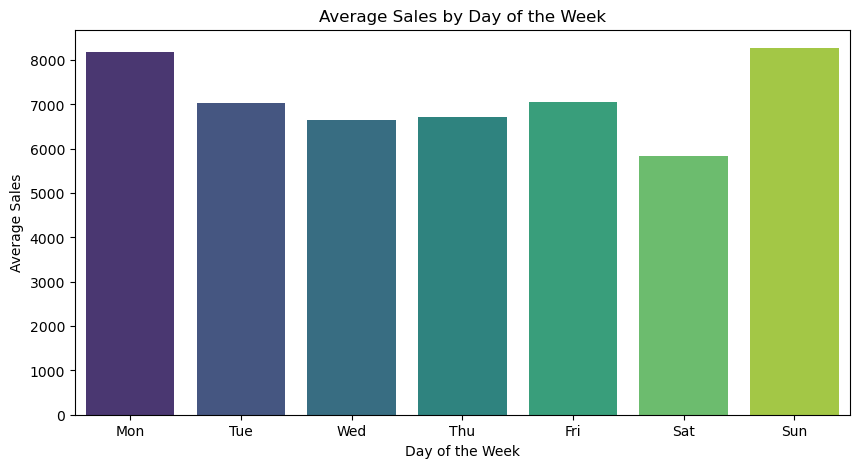

<Figure size 640x480 with 0 Axes>

In [43]:
# Calculate average sales by day of the week
mean_sales_by_day = day_week_sales['sales_mean']

# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_sales_by_day.index, y=mean_sales_by_day.values, palette='viridis')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()
plt.savefig('sales_day_week_mean_df_open.png', dpi=300)

In [44]:
day_week_sales = day_week_sales.sort_values(by=('sales_sum'), ascending=False)
day_week_sales # top and bottom sum of sales in all stores per day of the week

,sales_mean,sales_max,sales_min,sales_std,sales_sum
day_of_week,,,,,
1,8176.199707,38037,133,3704.918406,620050281
2,7039.071757,34692,0,3060.585304,554143885
5,7059.073044,36227,0,2761.848810,538289615
3,6652.271613,32149,0,2755.410723,510774719
4,6710.135952,37403,0,2746.348474,491839545
6,5840.874049,30940,0,2847.237697,461189574
7,8272.230337,37376,286,6176.351973,16197027


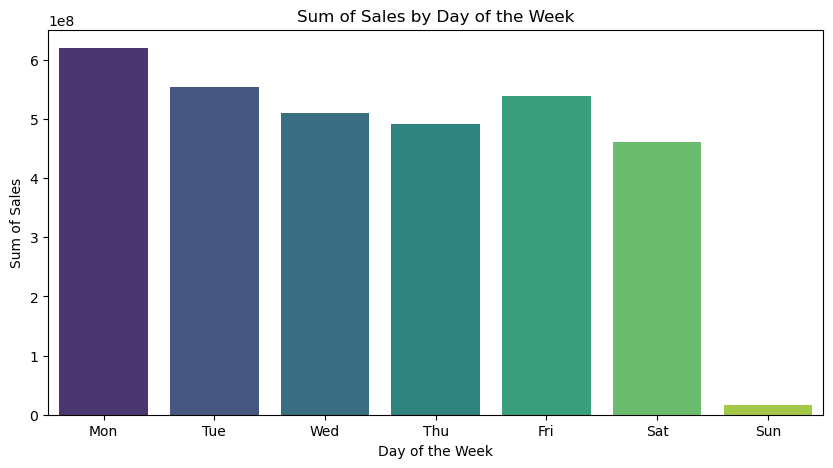

In [124]:
# Calculate average sales by day of the week
sum_sales_by_day = day_week_sales['sales_sum']

# Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=sum_sales_by_day.index, y=sum_sales_by_day.values, palette='viridis')
plt.title('Sum of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sum of Sales')
plt.xticks(ticks=range(0, 7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.savefig('sales_day_week_sum_df_open.png', dpi=300)
plt.show()
#  day 7 is usually closed so it has much lower sum of sales

#### Dates

In [46]:
print (df['date'].min()) # first day in the df
print(df['date'].max()) #last day in the df

2013-01-01 00:00:00
2015-03-31 00:00:00


In [47]:
# top 10 dates with higher sum of sales
df.groupby('date').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).head(10)

,sales
,sum
date,
2013-12-16,9713911
2013-12-23,9193454
2013-12-02,8265957
2014-06-30,8168953
2015-03-30,7992258
2013-12-17,7799832
2013-12-20,7714324
2013-12-18,7607398


In [48]:
# bottom 10 dates with lower sum of sales
df.groupby('date').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).tail(10)

,sales
,sum
date,
2013-01-20,85952
2013-05-01,82175
2013-01-27,80235
2013-07-28,80075
2013-01-13,75825
2014-01-19,71332
2014-01-01,71014
2015-01-18,65174


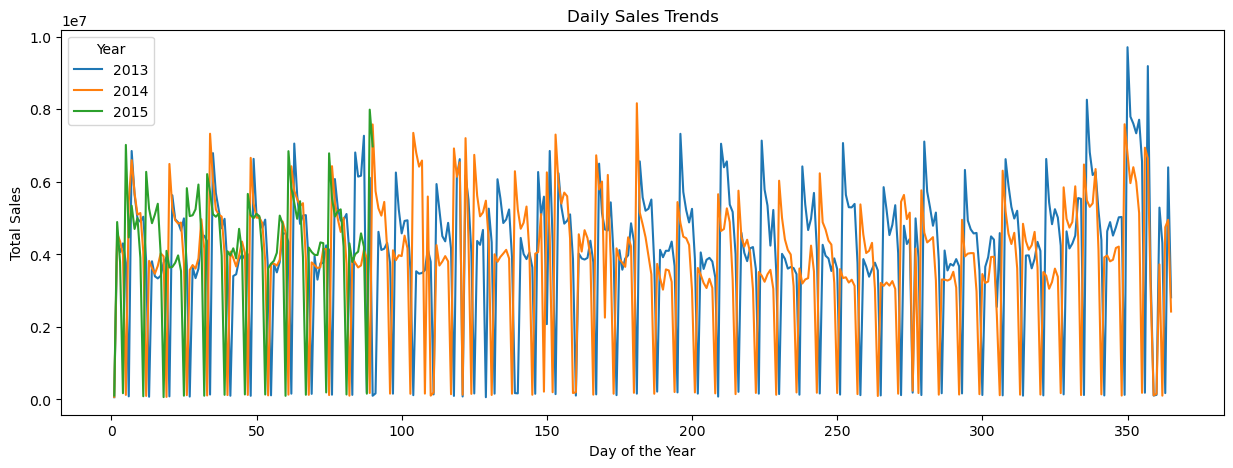

<Figure size 640x480 with 0 Axes>

In [49]:
# Sales Trend Over Time by Year

# Group sales by year and day of year
sales_trend_by_year = df.copy()
sales_trend_by_year['day_of_year'] = sales_trend_by_year['date'].dt.day_of_year
sales_trend_by_year = sales_trend_by_year.groupby(['year', 'day_of_year'])['sales'].sum().reset_index()

# Pivot for plotting
sales_pivot = sales_trend_by_year.pivot(index='day_of_year', columns='year', values='sales')

# Plotting
plt.figure(figsize=(15, 5))
for year in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[year], label=f"{year}")

plt.title('Daily Sales Trends')
plt.xlabel('Day of the Year')
plt.ylabel('Total Sales')
plt.legend(title="Year")
plt.show()
plt.savefig('sales_daily_trends_df.png', dpi=300)

# The peaks seem to follow a regular pattern, which suggests seasonality
# The regularity of these peaks suggests that customer behavior follows a predictable pattern each week.
# There are a few very prominent peaks that exceed others significantly. 
# These could correspond to holiday periods or special sales events like Black Friday, Christmas, or other major shopping periods.

In [50]:
day_sales = df.groupby('day').agg({'sales': ['mean','max','min','std','sum']})
day_sales.columns = ['_'.join(col).strip('_') for col in day_sales.columns.values]

day_sales = day_sales.sort_values(by=('sales_mean'), ascending=False)
day_sales
# last days of the month and the 1st are lower in sum of sales

,sales_mean,sales_max,sales_min,sales_std,sales_sum
day,,,,,
30,7003.984791,31810,0,4395.640095,113744713
4,6831.684288,32252,0,3869.028697,125224773
2,6712.050170,31773,0,4237.405994,122682853
5,6685.044645,32228,0,3784.181025,122035490
31,6462.233028,32368,0,4187.655676,69772730
18,6249.910813,35909,0,4034.312960,114154621
16,6224.636677,38037,0,4254.328109,113811257
17,6191.392299,34692,0,4018.936364,112559512
7,6152.588339,32263,0,3713.249845,111854056


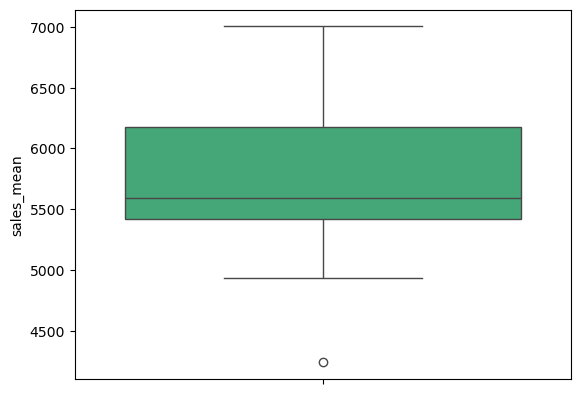

<Figure size 640x480 with 0 Axes>

In [51]:
sns.boxplot(day_sales['sales_mean'], color='#35b779')
plt.show()
plt.savefig('sales_daily_mean_df.png', dpi=300)

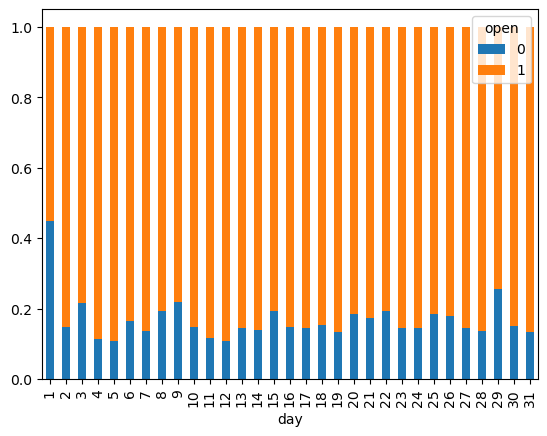

<Figure size 640x480 with 0 Axes>

In [52]:
day_open = df.groupby('day')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()
plt.savefig('day_open_close_ratio.png', dpi=300)

# first day of the months is more often closed then sales are 0 in almost 50% of the time

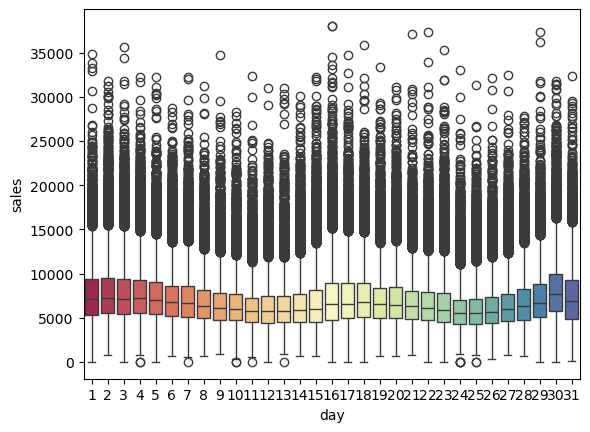

In [53]:
sns.boxplot(y='sales', x='day', data=df_opendays, palette='Spectral')
plt.savefig('sales_day_df_open.png', dpi=300)

In [54]:
month_sales = df.groupby('month').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']})
month_sales.columns = ['_'.join(col).strip('_') for col in month_sales.columns.values]
month_sales = month_sales.reset_index()
month_sales.sort_values(by=('sales_sum'), ascending=False)

# first months of the year and December have higher sum of sales

,month,sales_min,sales_mean,sales_max,sales_std,sales_sum
2,3,0,5784.065520,36227,3872.045809,378804235
0,1,0,5452.861614,32263,3568.053555,356638961
1,2,0,5645.027095,31649,3515.179706,332300165
11,12,0,6825.386305,38025,5049.164949,273206563
6,7,0,6035.865653,32221,3646.111907,241350124
4,5,0,5488.066315,37403,3936.864704,239334572
3,4,0,5651.294602,35909,3849.685899,238077739
5,6,0,5558.441905,38037,3856.874332,234699651
10,11,0,6007.007709,30940,3841.296806,232218904
7,8,0,5705.559173,32252,3550.383999,227651811


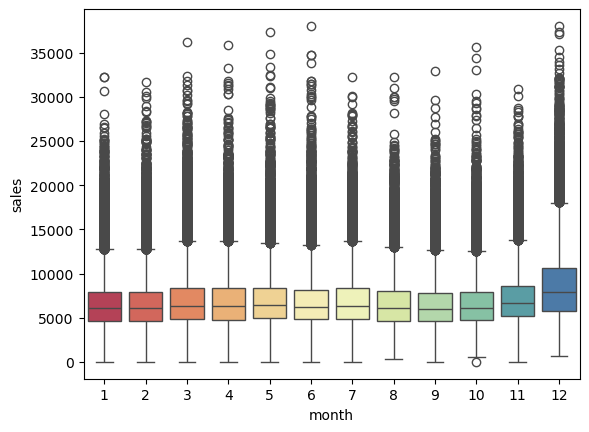

In [55]:
sns.boxplot(y='sales', x='month', data=df_opendays,palette='Spectral')
plt.savefig('sales_month_df_open.png', dpi=300)

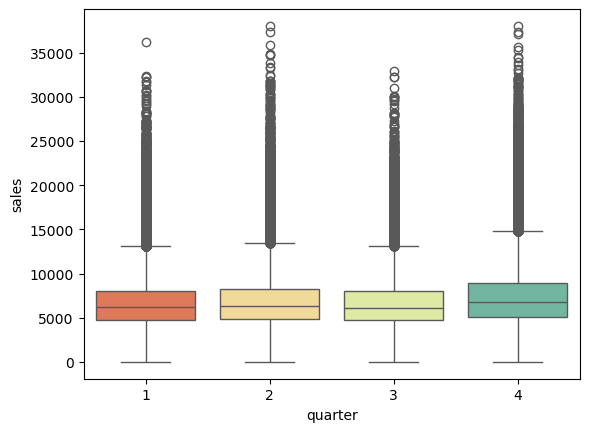

In [56]:
sns.boxplot(y='sales', x='quarter', data=df_opendays,palette='Spectral')
plt.savefig('sales_quarter_df_open.png', dpi=300)

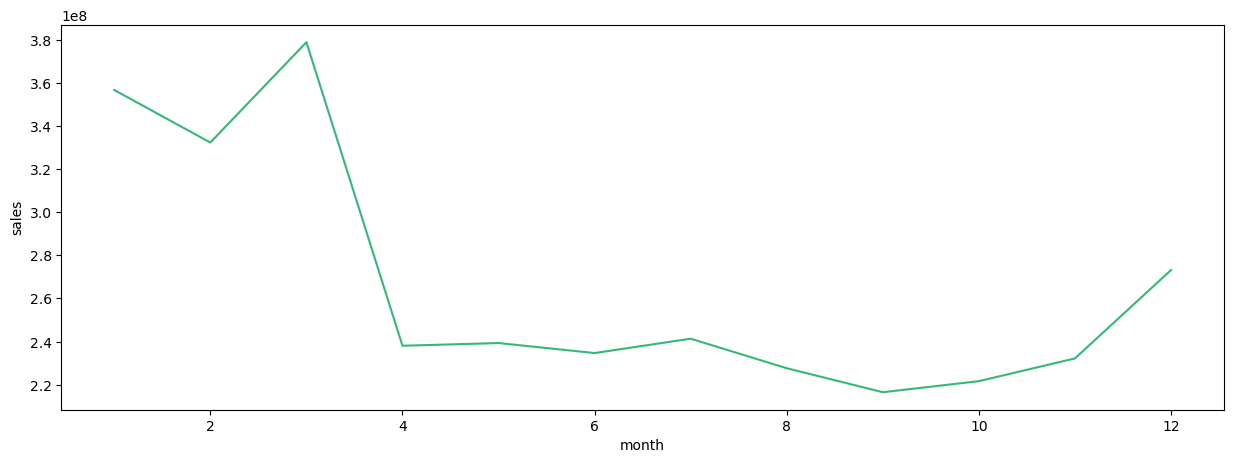

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(15,5))
plt.plot(month_sales['month'], month_sales['sales_sum'], color='#35b779')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()
plt.savefig('sales_monthly_trend_sum_df.png', dpi=300)
# March has much higher sum of sales

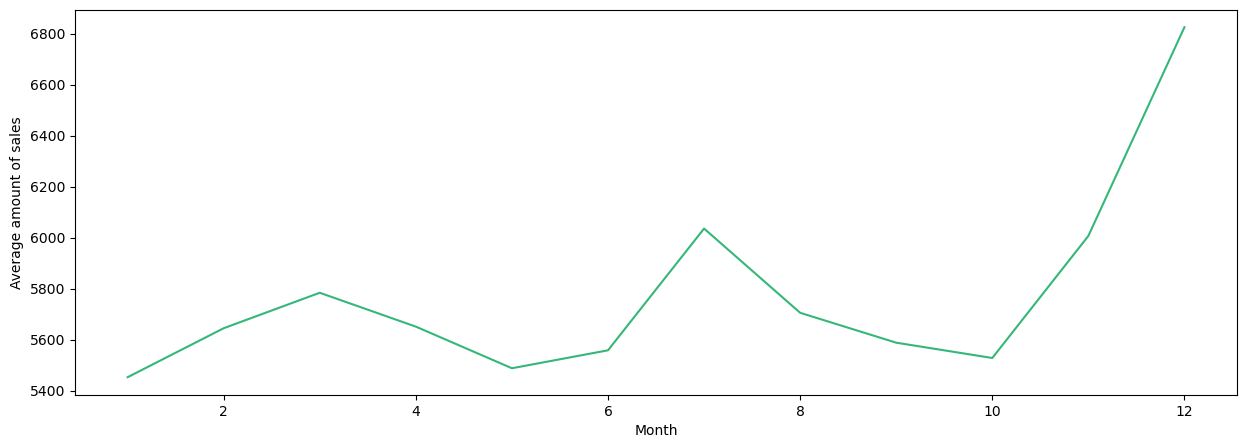

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize=(15,5))
plt.plot(month_sales['month'], month_sales['sales_mean'], color='#35b779')
plt.xlabel('Month')
plt.ylabel('Average amount of sales')
plt.show()
plt.savefig('sales_monthly_trend_mean_df.png', dpi=300)
#mean is much higher in December

      sales_min   sales_mean  sales_max    sales_std   sales_sum
year                                                            
2013          0  6817.014445      38025  3116.156837  1450728844
2014          0  7025.526557      38037  3130.030948  1375092262
2015          0  6882.598266      32228  2901.615314   366663540


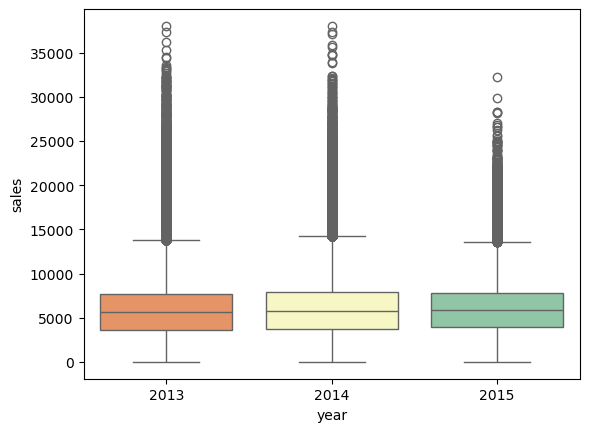

In [59]:
year_sales = df_opendays.groupby('year').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']})
year_sales.columns = ['_'.join(col).strip('_') for col in year_sales.columns.values]
year_sales.sort_values(by=('sales_sum'), ascending=False)
print(year_sales)

sns.boxplot(y='sales', x='year', data=df, palette='Spectral')
plt.savefig('sales_year_df_open.png', dpi=300)
# sum of sales is much lower in 2015 because we only have data until April but means are very similar

In [60]:
month_year_sales = df_opendays.groupby(['month', 'year']).agg(
    sales_mean=('sales', 'mean'),
    sales_min=('sales', 'min'),
    sales_max=('sales', 'max'),
    sales_std=('sales', 'std'),
    sales_sum=('sales', 'sum')
).reset_index()

month_year_sales['month_year'] = month_year_sales['month'].astype(str) + '-' + month_year_sales['year'].astype(str)
month_year_sales.sort_values(by=('sales_sum'), ascending=False)
# December, July and March are high selling months

,month,year,sales_mean,sales_min,sales_max,sales_std,sales_sum,month_year
25,12,2013,8609.965096,680,38025,4182.094544,145043472,12-2013
15,7,2013,6910.454374,0,32221,3115.696460,131692529,7-2013
8,3,2015,7057.239907,657,28339,3052.562200,130050817,3-2015
26,12,2014,8632.836522,908,37122,3981.630795,128163091,12-2014
6,3,2013,7226.464203,0,36227,3284.471181,127279714,3-2013
2,1,2015,6908.545042,124,32228,2845.459052,124927220,1-2015
17,8,2013,6604.317856,316,32252,2916.349253,124458370,8-2013
23,11,2013,6922.580476,745,30940,2913.893826,123741126,11-2013
12,5,2014,6949.055333,977,37403,2993.700866,123199802,5-2014
10,4,2014,7218.622757,0,35909,3191.422287,123077518,4-2014


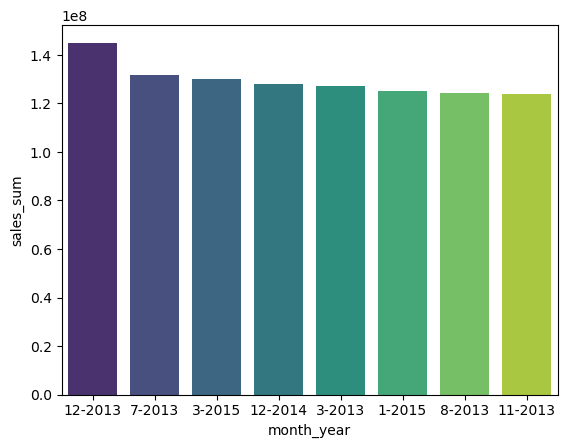

In [61]:
month_year_sales_top = month_year_sales.sort_values(by=('sales_sum'), ascending=False).head(8)
sns.barplot(y='sales_sum', x='month_year', data=month_year_sales_top, palette='viridis')
plt.savefig('sales_month_year_df_open.png', dpi=300)

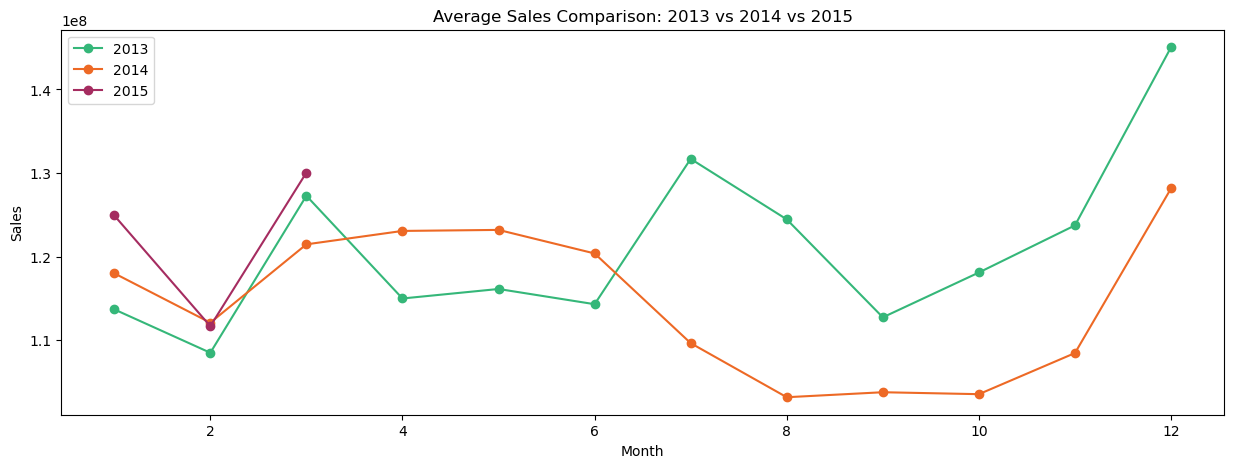

In [125]:
# Filter data for 2013, 2014, and 2015
month_year_sales_13 = month_year_sales[month_year_sales['year'] == 2013].sort_values(by='month', ascending=True)
month_year_sales_14 = month_year_sales[month_year_sales['year'] == 2014].sort_values(by='month', ascending=True)
month_year_sales_15 = month_year_sales[month_year_sales['year'] == 2015].sort_values(by='month', ascending=True).fillna(0)

plt.figure(figsize=(15, 5))

# Plot sales for 2013
plt.plot(month_year_sales_13['month'], month_year_sales_13['sales_sum'], label='2013', marker='o', color='#35b779')

# Plot sales for 2014
plt.plot(month_year_sales_14['month'], month_year_sales_14['sales_sum'], label='2014', marker='o', color='#ed6925')

# Plot sales for 2015
plt.plot(month_year_sales_15['month'], month_year_sales_15['sales_sum'], label='2015', marker='o', color='#a52c60')

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Average Sales Comparison: 2013 vs 2014 vs 2015')
plt.legend()
plt.savefig('sales_month_year_year.png', dpi=300)
plt.show()

#### Promotion

In [63]:
promo_sales = df_opendays.groupby('promotion').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
promo_sales = promo_sales.reset_index()
promo_sales.columns = ['_'.join(col).strip('_') for col in promo_sales.columns.values]
promo_sales
# promotion days have a higher sum of sales

,promotion,sales_min,sales_mean,sales_max,sales_std,sales_sum
0,1,0,8175.776472,38037,3170.053232,1680596260
1,0,0,5899.960141,37403,2636.006269,1511888386


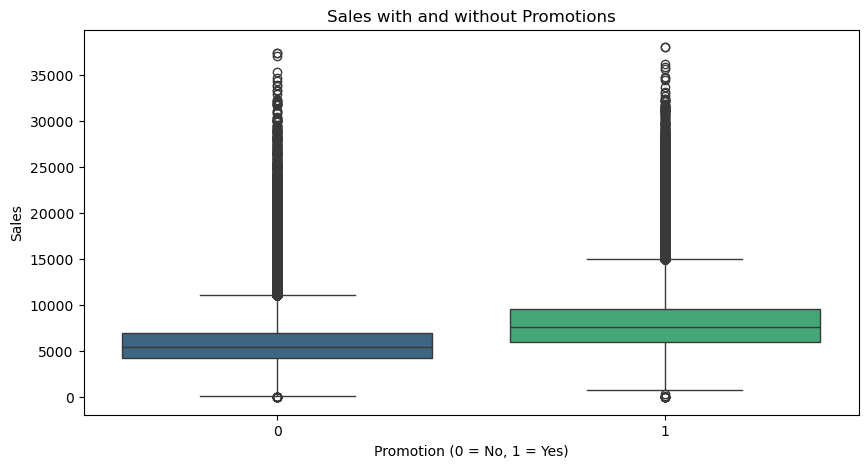

In [126]:
# Sales with and without Promotions
plt.figure(figsize=(10, 5))
sns.boxplot(x='promotion', y='sales', data=df_opendays, palette='viridis')
plt.title('Sales with and without Promotions')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Sales')
plt.savefig('sales_promo_df_open.png', dpi=300)
plt.show()

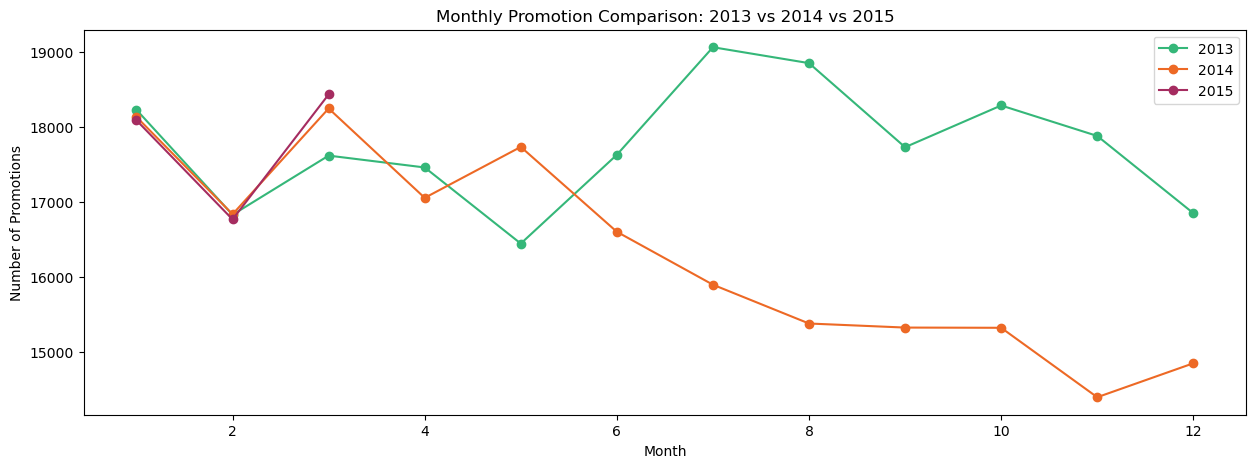

In [127]:
monthly_promo = df_opendays[['promotion', 'month', 'year']]

monthly_promo = monthly_promo.groupby(['month', 'year']).agg({'promotion': 'count'}).reset_index()

month_year_promo_13 = monthly_promo[monthly_promo['year'] == 2013].sort_values(by='month', ascending=True)
month_year_promo_14 = monthly_promo[monthly_promo['year'] == 2014].sort_values(by='month', ascending=True)
month_year_promo_15 = monthly_promo[monthly_promo['year'] == 2015].sort_values(by='month', ascending=True).fillna(0)

plt.figure(figsize=(15, 5))

# Plot promotions for 2013
plt.plot(month_year_promo_13['month'], month_year_promo_13['promotion'], label='2013', marker='o', color='#35b779')

# Plot promotions for 2014
plt.plot(month_year_promo_14['month'], month_year_promo_14['promotion'], label='2014', marker='o', color='#ed6925')

# Plot sales for 2015
plt.plot(month_year_promo_15['month'], month_year_promo_15['promotion'], label='2015', marker='o', color='#a52c60')

plt.xlabel('Month')
plt.ylabel('Number of Promotions')
plt.title('Monthly Promotion Comparison: 2013 vs 2014 vs 2015')

plt.legend()
plt.savefig('promo_month_year_df_open.png', dpi=300)
plt.show()

#### State Holiday

In [66]:
holiday_sales = df_opendays.groupby('state_holiday').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
holiday_sales = holiday_sales.reset_index()
holiday_sales.columns = ['_'.join(col).strip('_') for col in holiday_sales.columns.values]
holiday_sales

,state_holiday,sales_min,sales_mean,sales_max,sales_std,sales_sum
0,0,0,6911.113533,38037,3094.387907,3188525162
1,1,1103,8798.853333,37403,6295.275055,3959484


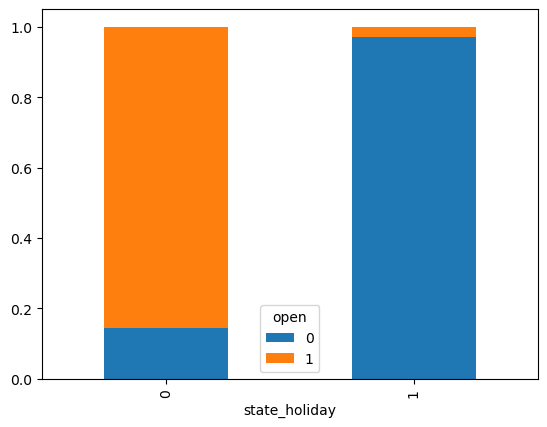

<Figure size 640x480 with 0 Axes>

In [67]:
day_open_holiday = df.groupby('state_holiday')['open'].value_counts(normalize=True).unstack()
day_open_holiday.plot(kind='bar', stacked='True')
plt.show()
plt.savefig('stateholiday_open_close_ratio.png', dpi=300)
# on state holidays stores are usually close so sales are mostly 0

#### School holiday

In [68]:
school_holiday = df.groupby('school_holiday').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
school_holiday.columns = ['_'.join(col).strip('_') for col in school_holiday.columns.values]
school_holiday
# school holidays have higher sums of sales

,sales_min,sales_mean,sales_max,sales_std,sales_sum
school_holiday,,,,,
0,0,5606.474426,38037,3840.467617,2561643017
1,0,6421.956481,35350,3713.345290,630841629


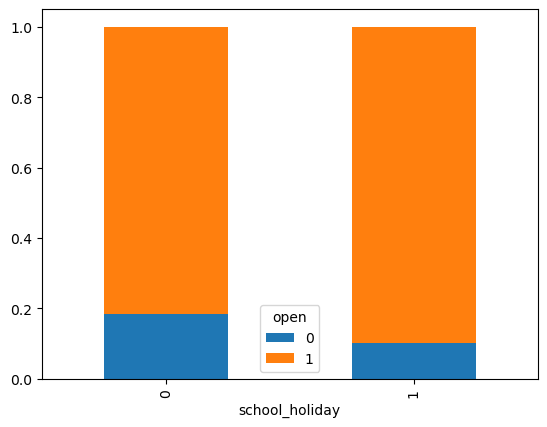

<Figure size 640x480 with 0 Axes>

In [69]:
day_open_school = df.groupby('school_holiday')['open'].value_counts(normalize=True).unstack()
day_open_school.plot(kind='bar', stacked='True')
plt.show()
plt.savefig('schoolholiday_open_close_ratio.png', dpi=300)
# stores are usually open on school holidays

### Correlations

In [70]:
df.columns

Index(['store_id', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales', 'day', 'month',
       'year', 'quarter', 'week'],
      dtype='object')

In [71]:
df_metrics = df [['day_of_week', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'quarter','sales']]

correlations_matrix = df_metrics.corr()['sales']
print(correlations_matrix.sort_values(ascending=False))

sales                  1.000000
nb_customers_on_day    0.896600
open                   0.674831
promotion              0.453581
school_holiday         0.081236
month                  0.052610
quarter                0.046967
year                   0.017961
day                   -0.015152
state_holiday         -0.245134
day_of_week           -0.463194
Name: sales, dtype: float64


In [72]:
df_metrics_open = df_opendays[['day_of_week', 'nb_customers_on_day',
       'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'quarter', 'sales']]

correlations_matrix_open = df_metrics_open.corr()['sales']
print(correlations_matrix_open.sort_values(ascending=False))

sales                  1.000000
nb_customers_on_day    0.827737
promotion              0.364889
month                  0.083866
quarter                0.070848
school_holiday         0.036849
year                   0.019431
state_holiday          0.019002
day                   -0.053220
day_of_week           -0.176930
Name: sales, dtype: float64


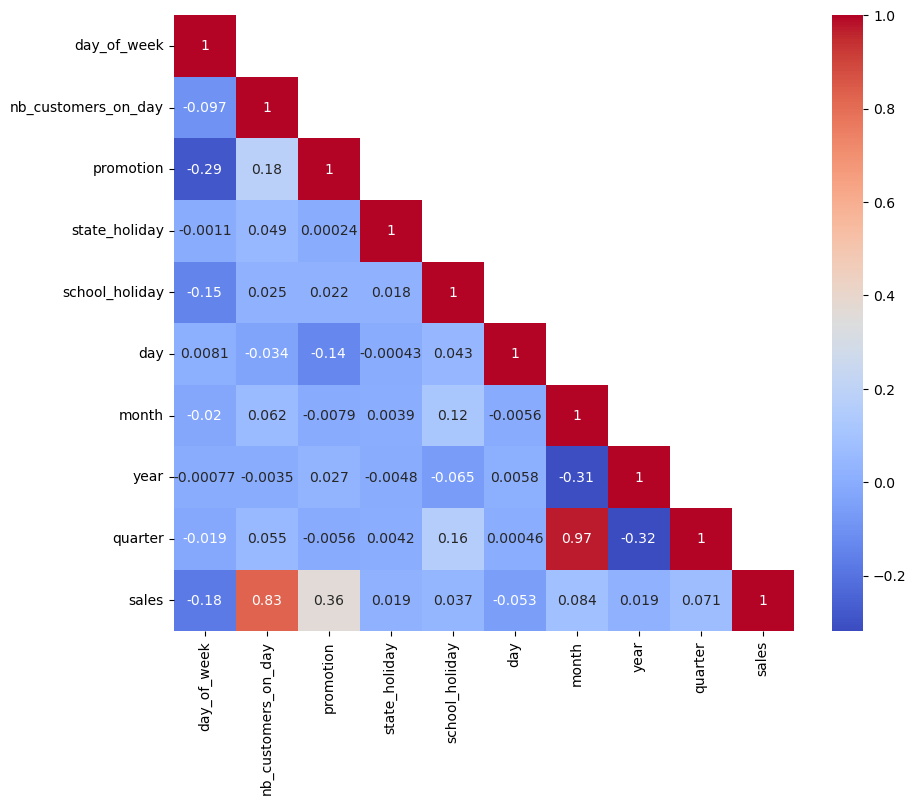

In [128]:
correlations_matrix_open = df_metrics_open.corr()

mask = np.zeros_like(correlations_matrix_open)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations_matrix_open, mask=mask, annot=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.savefig('first_corr_df_open.png', dpi=300)
plt.show()

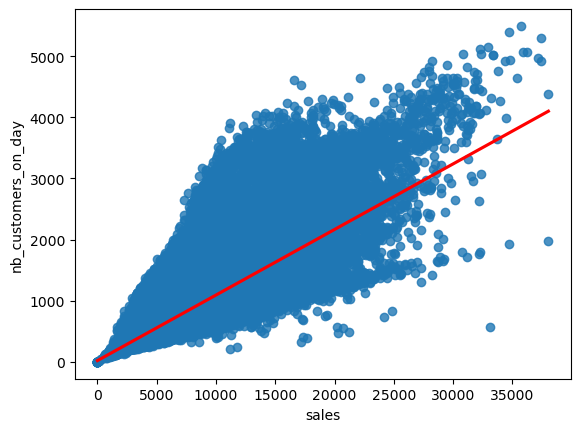

<Figure size 640x480 with 0 Axes>

In [74]:
# most highly correlated variable on open days
sns.regplot(x= 'sales', y= 'nb_customers_on_day', data=df_metrics_open, scatter=True, line_kws={"color": "red"})
plt.show()
plt.savefig('scatter_corr_df_open.png', dpi=300)
# however, training the model based on nb_customers_on_day can cause data leakage, since we wont have this variable in advance in the real world
# same thing for sales, we can feature new variables using sum or mean of sales or customers but using LAG

## Feature selection and engineering

On open days and when nb_customers_on_day is > 0, we will need to engineer more features with higher correlations with sales, but avoiding data leakage.

Another point to consider in sales forecasting is the seasonality of the data, so we are going to use lag when possible.

### Import and preprocess the 'production data'

In [76]:
df_prod = pd.read_excel(r"Future_data_with_label.xlsx").set_index('Index')

df_prod.columns = df_prod.columns.str.lower().str.replace(' ', '_')

coverage_mapping = {'a': 1, 'b': 1, 'c': 1, 0: 0}
df_prod['state_holiday'] = df_prod['state_holiday'].map(coverage_mapping)

df_prod['day'] = df_prod['date'].dt.day
df_prod['month'] = df_prod['date'].dt.month
df_prod['year'] = df_prod['date'].dt.year
df_prod['quarter'] = df_prod['date'].dt.quarter
df_prod ['week'] = df_prod ['date'].dt.isocalendar().week 

df_prod

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,week
Index,,,,,,,,,,,,,,
206630,125,3,2015-04-01,1906,1,1,0,1,17715,1,4,2015,2,14
60661,977,3,2015-04-01,485,1,1,0,1,4455,1,4,2015,2,14
373621,1019,3,2015-04-01,814,1,1,0,1,9938,1,4,2015,2,14
164705,309,3,2015-04-01,729,1,1,0,1,9803,1,4,2015,2,14
676424,1068,3,2015-04-01,444,1,1,0,1,7448,1,4,2015,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369531,58,5,2015-07-31,603,1,1,0,0,8581,31,7,2015,3,31
161452,241,5,2015-07-31,763,1,1,0,1,8650,31,7,2015,3,31
242869,293,5,2015-07-31,878,1,1,0,1,7494,31,7,2015,3,31


In [77]:
df_prod.nunique()

store_id                1115
day_of_week                7
date                     122
nb_customers_on_day     2698
open                       2
promotion                  2
state_holiday              2
school_holiday             2
sales                  13319
day                       31
month                      4
year                       1
quarter                    2
week                      18
dtype: int64

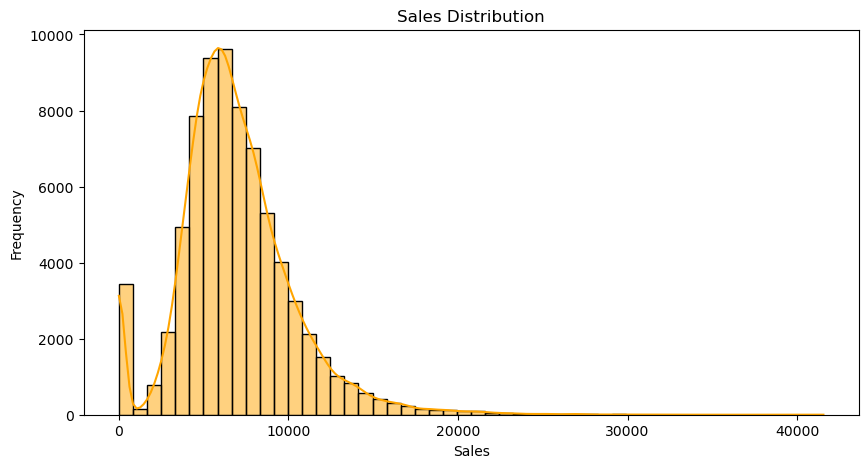

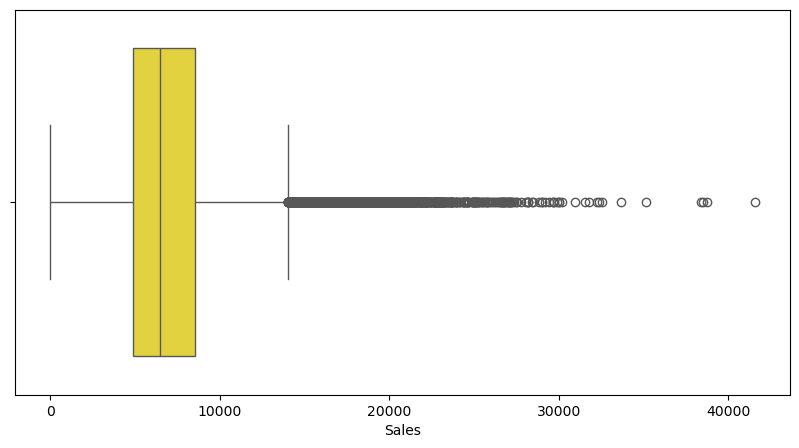

In [78]:
# Histogram for Sales Distribution on production
plt.figure(figsize=(10, 5))
sns.histplot(df_prod['sales'], bins=50, kde=True, color='orange')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Outliers in Sales
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_prod['sales'], color='#fde725')
plt.xlabel('Sales')
plt.show()

In [79]:
# To understand the outliers
# Calculate the summary statistics for 'sales'
min_val = df_prod['sales'].min()
Q1 = df_prod['sales'].quantile(0.25)
Q2 = df_prod['sales'].median()
Q3 = df_prod['sales'].quantile(0.75)
IQR = Q3 - Q1
max_val = df_prod['sales'].max()
upper_bound = Q3 + 1.5 * IQR

print(f"Summary statistics for 'sales':")
print(f"Minimum: {min_val}")
print(f"25th Percentile (Q1): {Q1}")
print(f"Median (Q2): {Q2}")
print(f"75th Percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Maximum: {max_val}")
print(f"Upper Bound (Q3 + 1.5 * IQR): {upper_bound}")

Summary statistics for 'sales':
Minimum: 0
25th Percentile (Q1): 4895.0
Median (Q2): 6509.0
75th Percentile (Q3): 8554.0
Interquartile Range (IQR): 3659.0
Maximum: 41551
Upper Bound (Q3 + 1.5 * IQR): 14042.5


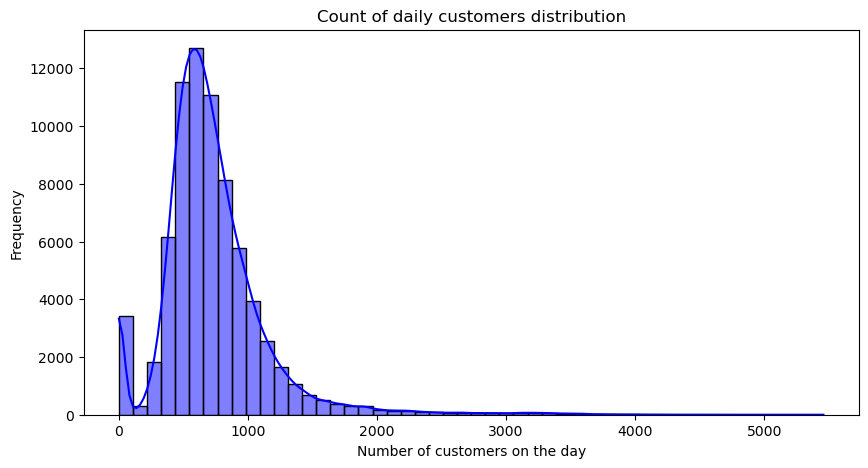

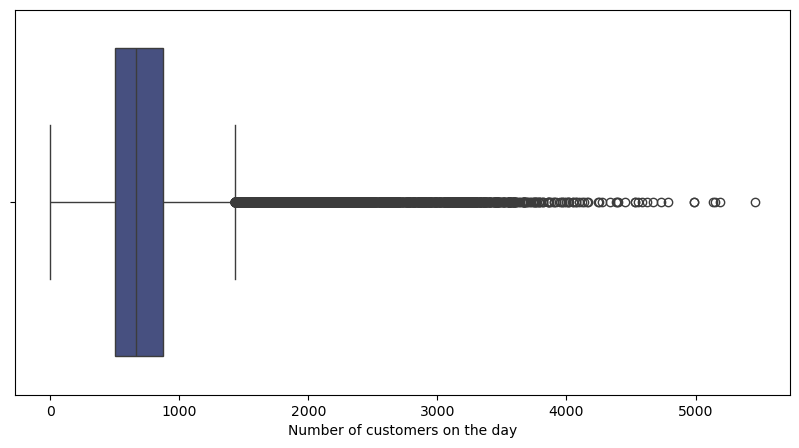

In [80]:
# Histogram for count of customers
plt.figure(figsize=(10, 5))
sns.histplot(df_prod['nb_customers_on_day'], bins=50, kde=True, color='blue')
plt.title('Count of daily customers distribution')
plt.xlabel('Number of customers on the day')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_prod['nb_customers_on_day'], color='#3e4989')
plt.xlabel('Number of customers on the day')
plt.show()

<Axes: xlabel='day_of_week', ylabel='sales'>

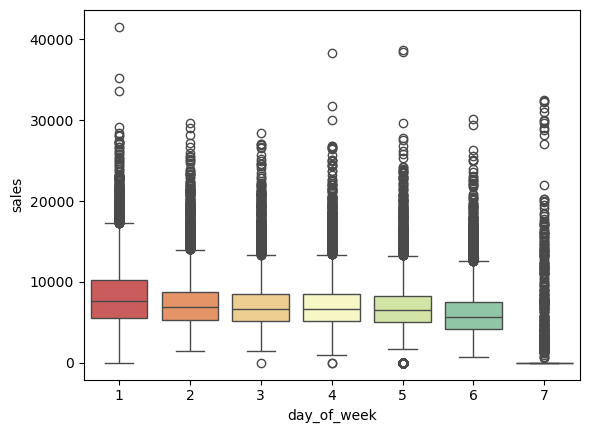

In [81]:
sns.boxplot(y='sales', x='day_of_week', data=df_prod, palette='Spectral')

In [82]:
df_prod = df_prod.to_csv('df_prod.csv')

### Prepare the dataset for the model

In [83]:
df = pd.read_csv(r"past_data_clean.csv").set_index('Index')
df_prod = pd.read_csv(r"df_prod.csv").set_index('Index')

df_model = pd.concat([df, df_prod], axis=0)
df_model['date'] = pd.to_datetime(df_model['date'])
df_model

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,week
Index,,,,,,,,,,,,,,
511306,52,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
150763,677,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
633749,348,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
106460,966,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
278363,750,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369531,58,5,2015-07-31,603,1,1,0,0,8581,31,7,2015,3,31
161452,241,5,2015-07-31,763,1,1,0,1,8650,31,7,2015,3,31
242869,293,5,2015-07-31,878,1,1,0,1,7494,31,7,2015,3,31


In [84]:
df_model.shape

(628700, 14)

In [85]:
df_model.isna().sum().sum()

0

In [86]:
print(df_model['date'].min())
print(df_model['date'].max())

2013-01-01 00:00:00
2015-07-31 00:00:00


### Filter and engineer features

In [87]:
df_model = df_model[(df_model['open'] == 1) & (df_model['nb_customers_on_day'] > 0)]
df_model.shape

(531926, 14)

In [88]:
print(df_model['date'].min())
print(df_model['date'].max())

2013-01-01 00:00:00
2015-07-31 00:00:00


In [89]:
# Cap to reduce outliers' influence
cap_value = df_model['sales'].quantile(0.95)
df_model['sales_capped'] = np.where(df_model['sales'] > cap_value, cap_value, df_model['sales'])

In [90]:
# Calculate weekly lag features grouped by store
df_model['sales_lag_7'] = (
    df_model.groupby('store_id')['sales']  
    .shift(7)                            
    .fillna(0))

# Calculate rolling averages for each store separately
df_model['rolling_sales_30'] = (
    df_model.groupby('store_id')['sales_capped']
    .rolling(window=30)
    .mean()
    .reset_index(level=0, drop=True))
monthly_mean = df_model.groupby(['store_id', 'year', 'month'])['sales_capped'].transform('mean')
df_model['rolling_sales_30'] = df_model['rolling_sales_30'].fillna(monthly_mean)

# Calculate the weekly sales change rate
df_model['weekly_sales_change_rate'] = (
    df_model.groupby('store_id')['sales_capped']
    .transform(lambda x: (x - x.shift(7)) / x.shift(7))
    .replace([np.inf, -np.inf], np.nan))
weekly_mean_change_rate = df_model.groupby(['store_id', 'year', 'month'])['weekly_sales_change_rate'].transform('mean')
df_model['weekly_sales_change_rate'] = df_model['weekly_sales_change_rate'].fillna(weekly_mean_change_rate)
df_model['weekly_sales_change_rate'] = df_model['weekly_sales_change_rate'].fillna(method='ffill')

# Calculate the monthly sales change rate
df_model['monthly_sales_change_rate'] = (
    df_model.groupby('store_id')['sales_capped']
    .transform(lambda x: (x - x.shift(30)) / x.shift(30))
    .replace([np.inf, -np.inf], np.nan))

# Fill NaNs in the first month with 0 
first_month_mask = (df_model['year'] == df_model['year'].min()) & (df_model['month'] == df_model['month'].min())
df_model.loc[first_month_mask, 'monthly_sales_change_rate'] = df_model.loc[first_month_mask, 'monthly_sales_change_rate'].fillna(0)
# Fill remaining NaNs with the median monthly change rate for each store
store_median_change_rate = df_model.groupby('store_id')['monthly_sales_change_rate'].transform('median')
df_model['monthly_sales_change_rate'] = df_model['monthly_sales_change_rate'].fillna(store_median_change_rate)

df_model

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,week,sales_capped,sales_lag_7,rolling_sales_30,weekly_sales_change_rate,monthly_sales_change_rate
Index,,,,,,,,,,,,,,,,,,,
580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1,1,3821.0,0.0,3735.764706,0.197244,0.000000
277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1,1,3102.0,0.0,2327.900000,0.084593,0.000000
253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1,1,9643.0,0.0,9034.526316,0.008919,0.000000
239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1,1,6851.0,0.0,6660.833333,0.111642,0.000000
60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1,1,5035.0,0.0,7736.933333,0.158292,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369531,58,5,2015-07-31,603,1,1,0,0,8581,31,7,2015,3,31,8581.0,7547.0,7297.900000,0.137008,0.289406
161452,241,5,2015-07-31,763,1,1,0,1,8650,31,7,2015,3,31,8650.0,7523.0,6924.433333,0.149807,-0.137931
242869,293,5,2015-07-31,878,1,1,0,1,7494,31,7,2015,3,31,7494.0,5587.0,6535.433333,0.341328,0.205017


In [91]:
df_model.describe()

,store_id,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,week,sales_capped,sales_lag_7,rolling_sales_30,weekly_sales_change_rate,monthly_sales_change_rate
count,531926.000000,531926.000000,531926.000000,531926.0,531926.000000,531926.000000,531926.000000,531926.000000,531926.000000,531926.000000,531926.00000,531926.000000,531926.000000,531926.000000,531926.000000,531926.000000,531926.000000,531926.000000
mean,558.220700,3.523103,763.015519,1.0,0.446350,0.001122,0.193651,6957.345900,15.844762,5.844960,2013.83195,2.295535,23.641006,6802.205999,6852.571140,6779.052020,0.067714,0.077185
std,321.573533,1.723695,401.066190,0.0,0.497114,0.033483,0.395159,3104.795372,8.686774,3.322704,0.77707,1.083195,14.384183,2622.800632,3194.195917,2053.115152,0.460219,0.464505
min,1.000000,1.000000,5.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.00000,1.000000,1.000000,0.000000,0.000000,1402.000000,-1.000000,-1.000000
25%,281.000000,2.000000,519.000000,1.0,0.000000,0.000000,0.000000,4859.000000,8.000000,3.000000,2013.00000,1.000000,11.000000,4859.000000,4786.000000,5265.933333,-0.177995,-0.181004
50%,558.000000,3.000000,676.000000,1.0,0.000000,0.000000,0.000000,6370.000000,16.000000,6.000000,2014.00000,2.000000,23.000000,6370.000000,6319.000000,6531.133333,0.000000,0.000000
75%,837.000000,5.000000,893.000000,1.0,1.000000,0.000000,0.000000,8363.000000,23.000000,8.000000,2014.00000,3.000000,35.000000,8363.000000,8320.000000,8005.550000,0.230194,0.240344
max,1115.000000,7.000000,5494.000000,1.0,1.000000,1.000000,1.000000,41551.000000,31.000000,12.000000,2015.00000,4.000000,52.000000,12672.000000,41551.000000,12672.000000,120.891304,92.826087


In [92]:
df_model.isna().sum().sum()

0

In [93]:
df_model.to_csv('df_model.csv')

#### Check correlations

In [99]:
df_model.columns

Index(['store_id', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales', 'day', 'month',
       'year', 'quarter', 'week', 'sales_capped', 'sales_lag_7',
       'rolling_sales_30', 'weekly_sales_change_rate',
       'monthly_sales_change_rate'],
      dtype='object')

In [100]:
# Checking if correlations have improved
metrics = df_model[['day_of_week', 'promotion', 'state_holiday', 'school_holiday', 'sales', 'day', 'month',
       'year', 'quarter', 'week', 'sales_lag_7', 'rolling_sales_30',
       'weekly_sales_change_rate', 'monthly_sales_change_rate']]
correlations = metrics.corr()['sales']
print(correlations.sort_values(ascending=False))

sales                        1.000000
rolling_sales_30             0.769414
sales_lag_7                  0.627135
promotion                    0.367124
monthly_sales_change_rate    0.290244
weekly_sales_change_rate     0.264581
week                         0.075460
month                        0.074500
quarter                      0.062601
school_holiday               0.039942
year                         0.035969
state_holiday                0.022372
day                         -0.051746
day_of_week                 -0.178175
Name: sales, dtype: float64


In [ ]:
""" Key features to keep:
rolling_sales_30             0.769414
sales_lag_7                  0.627135
promotion                    0.367124
monthly_sales_change_rate    0.290244
weekly_sales_change_rate     0.264581
month                        0.074500
day_of_week                 -0.178175
""" 

In [101]:
# Features such as year, month, and day_of_week have very low feature importance, which means they contribute very little to the predictive power of the model.
# Including these features may add noise rather than valuable information, potentially causing overfitting.

df_model_metrics = df_model[['date','sales','month','day_of_week','promotion','sales_lag_7','rolling_sales_30',
       'weekly_sales_change_rate', 'monthly_sales_change_rate',]]
df_model_metrics

,date,sales,month,day_of_week,promotion,sales_lag_7,rolling_sales_30,weekly_sales_change_rate,monthly_sales_change_rate
Index,,,,,,,,,
580156,2013-01-01,3821,1,2,0,0.0,3735.764706,0.197244,0.000000
277247,2013-01-01,3102,1,2,0,0.0,2327.900000,0.084593,0.000000
253110,2013-01-01,9643,1,2,0,0.0,9034.526316,0.008919,0.000000
239216,2013-01-01,6851,1,2,0,0.0,6660.833333,0.111642,0.000000
60765,2013-01-01,5035,1,2,0,0.0,7736.933333,0.158292,0.000000
...,...,...,...,...,...,...,...,...,...
369531,2015-07-31,8581,7,5,1,7547.0,7297.900000,0.137008,0.289406
161452,2015-07-31,8650,7,5,1,7523.0,6924.433333,0.149807,-0.137931
242869,2015-07-31,7494,7,5,1,5587.0,6535.433333,0.341328,0.205017


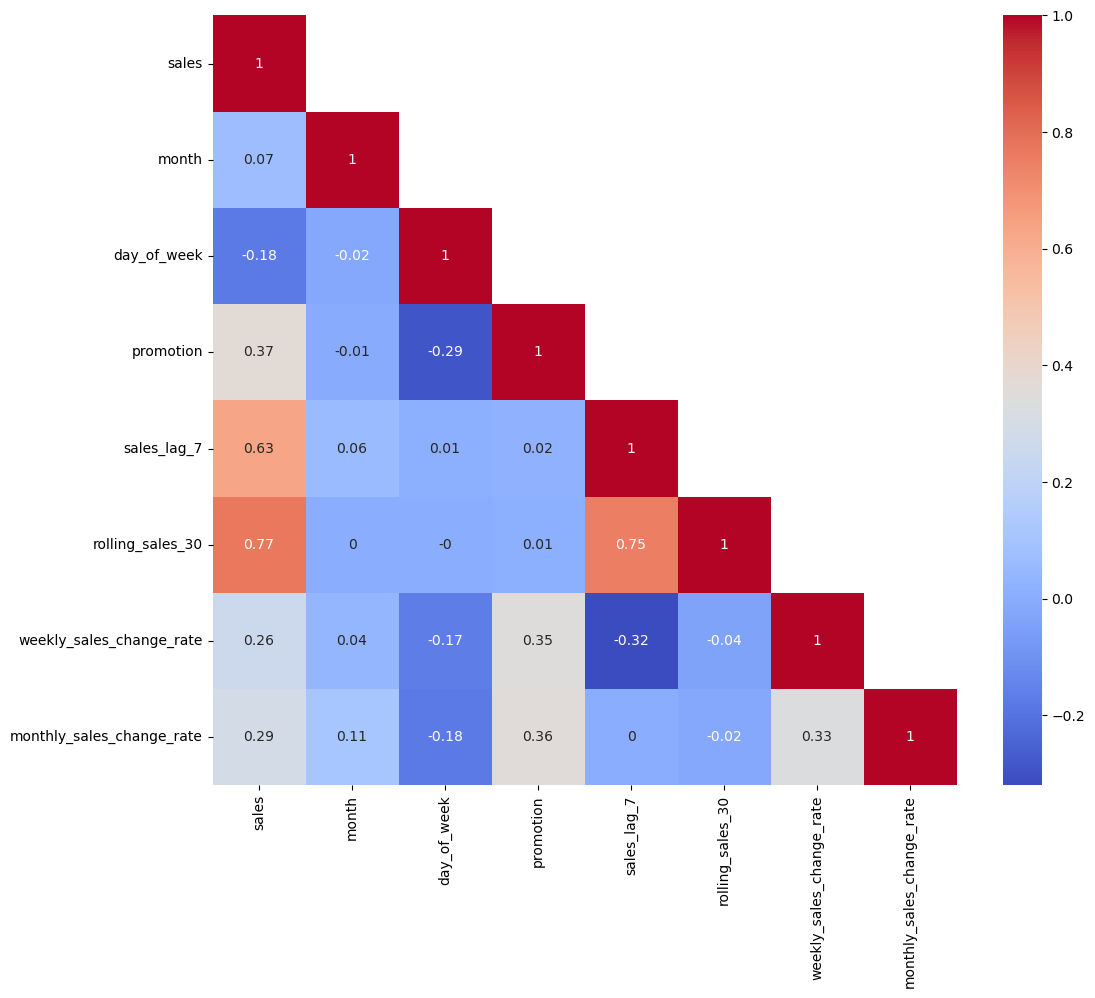

In [102]:
correlations_metrics = df_model_metrics.drop(['date'], axis=1)
correlations = round(correlations_metrics.corr(),2)

mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(12, 10)) 
sns.heatmap(correlations, mask=mask, annot=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.savefig('corr_model_df_model.png', dpi=300, bbox_inches='tight')
plt.show()

# High correlation among features is a sign of multicollinearity, which can lead to overfitting. 
# When features are highly correlated, they provide redundant information that can make the model more complex without adding real predictive value.   

## Prediction of Sales

### Load dataset ready for the model

In [94]:
df_model = pd.read_csv(r"df_model.csv").set_index('Index')
df_model['date'] = pd.to_datetime(df_model['date'])
df_model

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,week,sales_capped,sales_lag_7,rolling_sales_30,weekly_sales_change_rate,monthly_sales_change_rate
Index,,,,,,,,,,,,,,,,,,,
580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1,1,3821.0,0.0,3735.764706,0.197244,0.000000
277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1,1,3102.0,0.0,2327.900000,0.084593,0.000000
253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1,1,9643.0,0.0,9034.526316,0.008919,0.000000
239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1,1,6851.0,0.0,6660.833333,0.111642,0.000000
60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1,1,5035.0,0.0,7736.933333,0.158292,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369531,58,5,2015-07-31,603,1,1,0,0,8581,31,7,2015,3,31,8581.0,7547.0,7297.900000,0.137008,0.289406
161452,241,5,2015-07-31,763,1,1,0,1,8650,31,7,2015,3,31,8650.0,7523.0,6924.433333,0.149807,-0.137931
242869,293,5,2015-07-31,878,1,1,0,1,7494,31,7,2015,3,31,7494.0,5587.0,6535.433333,0.341328,0.205017


In [103]:
df_model_metrics = df_model[['date','sales','month','day_of_week','promotion','sales_lag_7','rolling_sales_30',
       'weekly_sales_change_rate', 'monthly_sales_change_rate',]]
df_model_metrics.shape

(531926, 9)

### Zero sales

In [95]:
sales_zero = df[(df['open'] == 0) | (df['nb_customers_on_day'] == 0)]
sales_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93355 entries, 511306 to 182263
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   store_id             93355 non-null  int64 
 1   day_of_week          93355 non-null  int64 
 2   date                 93355 non-null  object
 3   nb_customers_on_day  93355 non-null  int64 
 4   open                 93355 non-null  int64 
 5   promotion            93355 non-null  int64 
 6   state_holiday        93355 non-null  int64 
 7   school_holiday       93355 non-null  int64 
 8   sales                93355 non-null  int64 
 9   day                  93355 non-null  int64 
 10  month                93355 non-null  int64 
 11  year                 93355 non-null  int64 
 12  quarter              93355 non-null  int64 
 13  week                 93355 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 10.7+ MB


In [96]:
# Linear Regression Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_zero = sales_zero['sales']
X_zero = sales_zero.drop(['sales'], axis=1).select_dtypes(include=['number'])

lm_zero = linear_model.LinearRegression()
lm_zero = lm_zero.fit(X_zero,y_zero)

lm_zero.score(X_zero,y_zero)

pred_zero = lm_zero.predict(X_zero)

print("R2 value is = ",round(r2_score(y_zero, pred_zero),2))
mse_zero = mean_squared_error (y_zero, pred_zero)
mae_zero = mean_absolute_error (y_zero, pred_zero)
print("The mse of the model is = ",mse_zero)
print("The root mse of the model is = ",np.sqrt(mse_zero))
print("The mean absolute error of the model is = ",mae_zero)

R2 value is =  1.0
The mse of the model is =  0.0
The root mse of the model is =  0.0
The mean absolute error of the model is =  0.0


In [97]:
pred_zero
# it only predicts zeros as it should

array([0., 0., 0., ..., 0., 0., 0.])

### Chronological split for Open Days

In time series data, using a random_state to split the data into training and test sets is generally not recommended. This is because time series data is inherently ordered, and random splits can disrupt the temporal sequence, which is crucial for maintaining the integrity of the data’s temporal dependencies.

In [104]:
# X/y SPLIT
# Prepare features, target, and dates
y = df_model_metrics['sales']
X = df_model_metrics.drop(['sales','date'], axis=1)
dates = df_model_metrics['date']  # Keep 'date' aside for later use
dates = pd.to_datetime(dates)

X.shape

(531926, 7)

In [105]:
print(dates.min())
print(dates.max())

2013-01-01 00:00:00
2015-07-31 00:00:00


In [106]:
# X_train, y_train: Features and target for training
# X_test, y_test: Features and target for testing
# dates_train: The corresponding 'date' values for X_train
# dates_test: The corresponding 'date' values for X_test

# Define the split point (training ends at June 2014, testing starts July 2014)
train_end_date = pd.Timestamp('2014-06-30')  # Training ends on this date
test_start_date = pd.Timestamp('2014-07-01')  # Testing starts on this date
test_end_date = pd.Timestamp('2015-03-31')  # Testing ends on this date

# Create masks for each split
train_mask = (dates >= pd.Timestamp('2013-01-01')) & (dates <= train_end_date)
test_mask = (dates >= test_start_date) & (dates <= test_end_date)

# Apply the masks to split the features (X) and target (y)
X_train = X[train_mask]
y_train = y[train_mask]
dates_train = dates[train_mask]

X_test = X[test_mask]
y_test = y[test_mask]
dates_test = dates[test_mask]

# Print the split sizes to verify
print(f"Training size: {len(X_train)}, Testing size: {len(X_test)}")

Training size: 317373, Testing size: 144412


In [107]:
prod_start_date = pd.Timestamp('2015-04-01')  # Production starts on this date
prod_mask = (dates >= prod_start_date)

X_prod = X[prod_mask]
y_prod = y[prod_mask]
dates_prod = dates[prod_mask]

print(f"Production size: {len(X_prod)}")

Production size: 70141


### Build the ML model (Decision Tree)

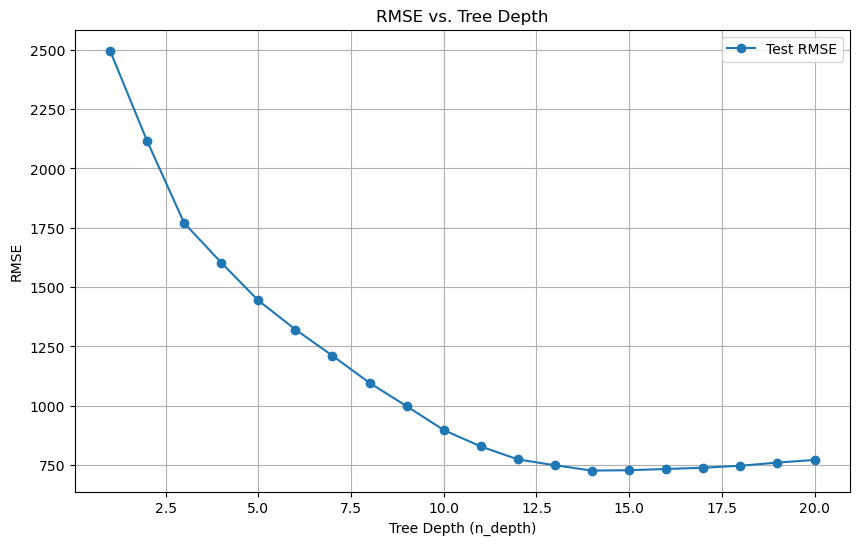

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

max_depth = range(1, 21)  # Depth values from 1 to 20
tree_test = []

# Loop over each depth value
for depth in max_depth:
    model_tree = DecisionTreeRegressor(max_depth=depth)
    model_tree.fit(X_train,y_train)
    
    # Calculate RMSE for test set
    pred_tree_test = model_tree.predict(X_test)
    mse_tree = mean_squared_error(y_test, pred_tree_test)
    tree_test.append(np.sqrt(mse_tree))

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.plot(max_depth, tree_test, label="Test RMSE", marker='o')  # x-axis as n_depth
plt.ylabel("RMSE")
plt.xlabel("Tree Depth (n_depth)")
plt.title("RMSE vs. Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

In [109]:
tree_model = DecisionTreeRegressor(max_depth = 14) 
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=14)

In [110]:
tree_pred = tree_model.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R2 value is = ",round(r2_score(y_test, tree_pred),2))
mse = mean_squared_error (y_test, tree_pred)
mae = mean_absolute_error (y_test, tree_pred)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.94
The mse of the model is =  535748.1385961958
The root mse of the model is =  731.9481802670158
The mean absolute error of the model is =  291.6630357897083


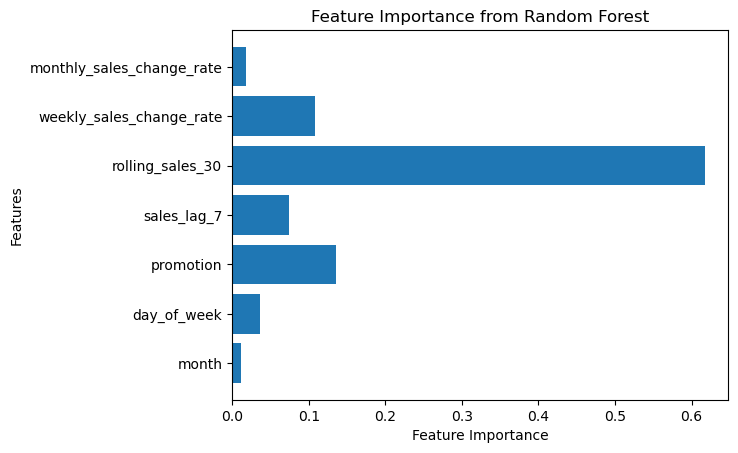

In [112]:
importances = tree_model.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight') 
plt.show()

### Improve the model (Gradient Boosting)

In [116]:
# TimeSeriesSplit for cross-validation because it respects the temporal nature of the data, prevents data leakage, 
# and better simulates real-world forecasting scenarios.

from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model definition using Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [80,100,120],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [14,15],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]}

# TimeSeriesSplit Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=20, cv=tscv, 
                                   scoring='neg_mean_squared_error', verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [117]:
random_search.best_params_ 

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 14,
 'learning_rate': 0.05}

In [118]:
# Load the trained model
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [119]:
best_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=14, min_samples_leaf=2,
                          min_samples_split=4, random_state=42)

In [129]:
# Predict on test data
y_pred_test = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R2 value is = ",round(r2_score(y_test, y_pred_test),2))
mse = mean_squared_error (y_test, y_pred_test)
mae = mean_absolute_error (y_test, y_pred_test)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.97
The mse of the model is =  334664.7579500139
The root mse of the model is =  578.5021676277574
The mean absolute error of the model is =  146.44207463254625


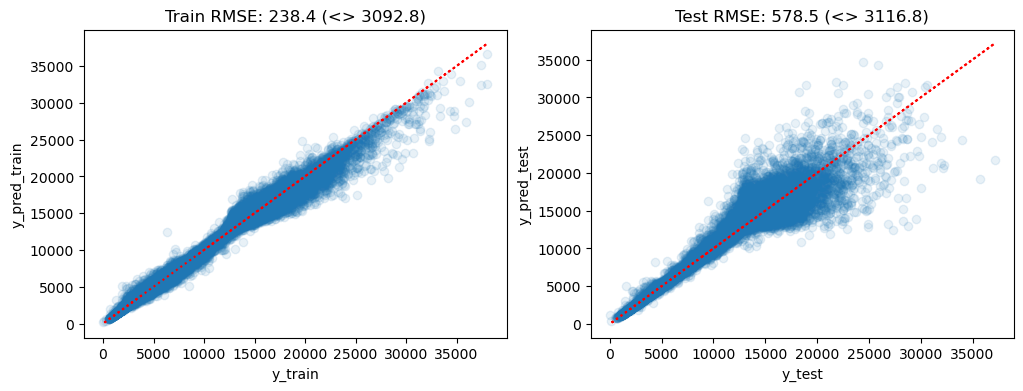

In [130]:
"""Below there are two scatter plots, one with the actual and predicted values for training and a similar one with the predicted values for the testing data.
Both root mean squared errors are relatively low, meaning the model performs well enough for this use case."""

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Make baseline predictions
y_pred_train_baseline = np.ones_like(y_train) * y_train.mean()
y_pred_test_baseline = np.ones_like(y_test) * y_train.mean()

# Measure train, test, and baseline performance
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)).round(1)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test)).round(1)

rmse_train_baseline = np.sqrt(mean_squared_error(y_train, y_pred_train_baseline)).round(1)
rmse_test_baseline = np.sqrt(mean_squared_error(y_test, y_pred_test_baseline)).round(1)

# Create performance report 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# Train set scatter plot
title1 = 'Train RMSE: {} (<> {})'.format(rmse_train, rmse_train_baseline) 
ax1.set(title=title1, xlabel='y_train', ylabel='y_pred_train')
ax1.plot(y_train, y_train, color='red', linestyle=':')
ax1.scatter(y_train, y_pred_train, alpha=0.1)

# Test set scatter plot
title2 = 'Test RMSE: {} (<> {})'.format(rmse_test, rmse_test_baseline)
ax2.set(title=title2, xlabel='y_test', ylabel='y_pred_test')
ax2.plot(y_test, y_test, color='red', linestyle=':')
ax2.scatter(y_test, y_pred_test, alpha=0.1)

# Save and show the plot
plt.savefig('performance_rmse.png', dpi=300, bbox_inches='tight')
plt.show()

### Apply model to production

In [131]:
import joblib
model = joblib.load('best_model.pkl')

In [132]:
# Make predictions on the filtered data
y_pred_prod = model.predict(X_prod)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("R2 value is = ",round(r2_score(y_prod, y_pred_prod),2))
mse = mean_squared_error (y_prod, y_pred_prod)
mae = mean_absolute_error (y_prod, y_pred_prod)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.96
The mse of the model is =  342373.6614773911
The root mse of the model is =  585.1270472960475
The mean absolute error of the model is =  132.2027508276387


#### Save predictions

In [133]:
# Create a copy of the full dataset
df_complete = df_model.copy()

# Add actual values and predictions for the training set
df_complete.loc[train_mask, 'y_train'] = y_train

# Add actual values and predictions for the test set
df_complete.loc[test_mask, 'y_test'] = y_test
df_complete.loc[test_mask, 'y_pred_test'] = y_pred_test  # predictions for testing

# Add actual values and predictions for the production set
df_complete.loc[prod_mask, 'y_prod'] = y_prod
df_complete.loc[prod_mask, 'y_pred_prod'] = y_pred_prod  # predictions for production

# Optionally, sort by date to keep everything in chronological order
df_complete = df_complete.sort_values(by='date')

df_complete

,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,...,sales_capped,sales_lag_7,rolling_sales_30,weekly_sales_change_rate,monthly_sales_change_rate,y_train,y_test,y_pred_test,y_prod,y_pred_prod
Index,,,,,,,,,,,,,,,,,,,,,
580156,676,2,2013-01-01,777,1,0,1,1,3821,1,...,3821.0,0.0,3735.764706,0.197244,0.000000,3821.0,NaN,NaN,NaN,NaN
512628,530,2,2013-01-01,532,1,0,1,1,2907,1,...,2907.0,0.0,2500.500000,-0.072071,0.000000,2907.0,NaN,NaN,NaN,NaN
288050,85,2,2013-01-01,619,1,0,1,1,4220,1,...,4220.0,0.0,6571.950000,0.081786,0.000000,4220.0,NaN,NaN,NaN,NaN
397229,262,2,2013-01-01,2875,1,0,1,1,17267,1,...,12672.0,0.0,12672.000000,0.000000,0.000000,17267.0,NaN,NaN,NaN,NaN
338008,335,2,2013-01-01,482,1,0,1,1,2401,1,...,2401.0,0.0,10836.777778,0.351417,0.000000,2401.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15158,965,5,2015-07-31,1013,1,1,0,1,9958,31,...,9958.0,6951.0,8119.733333,0.432600,0.522397,NaN,NaN,NaN,9958.0,9867.995553
152766,962,5,2015-07-31,1119,1,1,0,1,9370,31,...,9370.0,4483.0,7058.733333,1.090118,0.638112,NaN,NaN,NaN,9370.0,9491.818169
638672,353,5,2015-07-31,1851,1,1,0,1,7851,31,...,7851.0,5514.0,6823.933333,0.423830,0.225187,NaN,NaN,NaN,7851.0,7851.255521


In [134]:
# Save to a CSV or pickle file for later use
df_complete.to_csv('complete_with_predictions.csv', index=False)  